In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter
from datetime import datetime
import matplotlib.colors as mcolors
import os
from sklearn.cluster import KMeans

# import font
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('LeelaUIb.ttf')
mpl.rc('font', family = 'Leelawadee UI', size = 20)

In [2]:
dataframe = pd.read_csv(r"C:\Users\phznz\Downloads\Datasoldto3.csv")
rename = {'CUST ID (customer dim)':'Cust Id', 'MCH3 Desc':'Assmt Desc', 
        'Net Inc Tax (SUM)': 'Net Inc Tax', 'ACC GRP ID (customer dim)': 'Acc Grp Id', 'Net Inc Tax (SUM) (SUM)':'Net Inc Tax',
        'No of day (AGG) (SUM)' : 'No of day', 'Sale Qty (SUM) (SUM)' : 'Sale Qty'}
dataframe = pd.read_csv(r"C:\Users\phznz\Downloads\DATA (Cust_Soldto4)_DATA.csv").rename(columns = rename)
dataframe = dataframe.dropna(subset = ['Cust Id'])
dataframe = dataframe.loc[dataframe['Cust Id'] != 'NA']
dataframe = dataframe.loc[dataframe['Cust Id'] != 'inf']
dataframe['Cust Id'] = dataframe['Cust Id'].astype(int)
dataframe['Cust Id'] = dataframe['Cust Id'].astype(str)
dataframe.head(2)

C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Acc Grp Id,Cust Id,Cust Name,CUSTOMER TYPE BI (customer dim),Date Id (MONTH),Date Id (QUARTER),Date Id (YEAR),Assmt Desc,MEMBER FLAG (customer dim),Sale Office,Net Inc Tax,No of day,Sale Qty
0,C001,10001999,วัชรินทร์ เกตุปาน,NaN,1,1,2021,ประตู บานซิงค์และอุปกรณ์,NaN,รังสิต-สำนักงานใหญ่,20020.0,1,10.0
1,C001,11646147,บุญบารมี ทวีสิน,NaN,3,1,2021,ห้องน้ำ,NaN,เชียงใหม่,31500.0,1,3.0


In [3]:
from datetime import datetime

df = dataframe
df['QY'] = dataframe['Date Id (YEAR)'].astype(str) + 'Q' + dataframe['Date Id (QUARTER)'].astype(str)
df['QY'] = pd.to_datetime(df['QY']).dt.to_period('Q')
df['MY'] = dataframe['Date Id (YEAR)'].astype(str) + ' - ' + dataframe['Date Id (MONTH)'].astype(str)
df['MY'] = pd.to_datetime(df['MY']).dt.to_period('M')
df['Time Date'] = df['MY']
df['assume Date'] = df['Date Id (YEAR)'].astype(str) + '-' + df['Date Id (MONTH)'].astype(str)+'-1'
df['assume Date'] = df['assume Date'].apply(lambda X : datetime.strptime(X, '%Y-%m-%d'))



df.drop(columns = ['Date Id (MONTH)', 'Date Id (QUARTER)', 'Date Id (YEAR)'], inplace = True)
df.head()

,Acc Grp Id,Cust Id,Cust Name,CUSTOMER TYPE BI (customer dim),Assmt Desc,MEMBER FLAG (customer dim),Sale Office,Net Inc Tax,No of day,Sale Qty,QY,MY,Time Date,assume Date
0,C001,10001999,วัชรินทร์ เกตุปาน,NaN,ประตู บานซิงค์และอุปกรณ์,NaN,รังสิต-สำนักงานใหญ่,20020.0,1,10.0,2021Q1,2021-01,2021-01,2021-01-01
1,C001,11646147,บุญบารมี ทวีสิน,NaN,ห้องน้ำ,NaN,เชียงใหม่,31500.0,1,3.0,2021Q1,2021-03,2021-03,2021-03-01
2,C001,10023240,น้ำฝน ประภาสุข,บุคคล,ฮาร์ดแวร์,Y,พุทธมณฑล,454.0,1,2.0,2021Q2,2021-05,2021-05,2021-05-01
3,C001,12297504,อรพรรณ สุวรรณบุตร,NaN,ห้องน้ำ,NaN,หัวหิน,6959.0,1,3.0,2021Q4,2021-12,2021-12,2021-12-01
4,C001,10567145,ทนงศักดิ์ บุคนะ,NaN,ฮาร์ดแวร์,NaN,เกษตร-นวมินทร์,1456.0,2,13.0,2020Q1,2020-03,2020-03,2020-03-01


In [4]:
listofcust3 = []
for i in df['Cust Id']:
    if i[0] == '3':
        listofcust3.append(i)
listofcust3

[]

In [5]:
principal_col = ['Acc Grp Id', 'Cust Id', 'Cust Name', 
                    'Assmt Desc', 'Net Inc Tax', 'Sale Qty', 'Sale Office', 'Time Date', 'assume Date', 'QY', 'MY']

df_used = df.loc[:, principal_col]
df_used['Cust Id'] = df_used['Cust Id'].astype(str)

In [6]:
# ----- filter to exclude ------
clean = df_used
filtered = clean.loc[   (clean['Net Inc Tax'] > 0) & \
                        (clean['Sale Qty'] > 0 ) & \
                        (clean['Acc Grp Id'] != 'C003') & (clean['Acc Grp Id'] != 'C009') &\
                        (clean['Acc Grp Id'] != 'C010') ]                
                    # (clean['Net Inc Tax'] != 0.01) & (clean['Net Inc Tax'] != 0.01)]
                     #& (clean['Net Inc Tax'] < clean['Net Inc Tax'].quantile(0.9999))]

listofcust3 = []
for i in df['Cust Id']:
    if i[0] == '3':
        listofcust3.append(i)

for j in listofcust3:
    filtered = filtered.loc[ filtered['Cust Id'] != j]

# Create date period in quarter-year and month-year
df_time = filtered
# df_time['MY'] = df_time['MY'].dt.to_period('M')
# df_time['QY'] = df_time['QY'].dt.to_period('Q')


# create frequency of purchase in month-year and quarter-year
df_freqq = df_time[['Cust Id', 'QY']]\
                    .groupby(['Cust Id', 'QY']).count() \
                    .reset_index().groupby('Cust Id').count().reset_index()
df_freqq = df_freqq.rename(columns = {'QY' : 'freq Q'})

df_freqm = df_time[['Cust Id', 'MY']]\
                    .groupby(['Cust Id', 'MY']).count() \
                    .reset_index().groupby('Cust Id').count().reset_index()
df_freqm = df_freqm.rename(columns = {'MY' : 'freq M'})

frequency = df_freqm.merge(df_freqq, how = 'inner', on = 'Cust Id')

# ----- Perfect Data -----

insight = df_time.merge(frequency, how = 'inner', on = 'Cust Id')

In [7]:
insightcustname = insight[['Cust Id', 'Cust Name']]

https://github.com/rogerhung1006/CustomerSegmentation_RFM_Clustering/blob/master/RFM_Analysis_With_Clustering.ipynb

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.style.use('seaborn-whitegrid')

In [9]:
print(max(insight['assume Date']))
print(min(insight['assume Date']))

2022-04-01 00:00:00
2020-01-01 00:00:00


In [10]:
sales = insight[['Cust Id', 'Cust Name', 'assume Date', 'Net Inc Tax']]

In [11]:
sales.dropna(subset = list(sales.columns))

,Cust Id,Cust Name,assume Date,Net Inc Tax
0,10001999,วัชรินทร์ เกตุปาน,2021-01-01,20020.0
1,10001999,วัชรินทร์ เกตุปาน,2021-04-01,1319.0
2,10001999,วัชรินทร์ เกตุปาน,2020-04-01,65.0
3,10001999,วัชรินทร์ เกตุปาน,2021-07-01,330.0
4,10001999,วัชรินทร์ เกตุปาน,2021-12-01,733.0
...,...,...,...,...
1867590,40000791,นิพนธ์ พรศรี,2021-01-01,12360.0
1867591,40000791,นิพนธ์ พรศรี,2021-08-01,1300.0
1867592,40000791,นิพนธ์ พรศรี,2022-02-01,2734.7
1867593,40000799,ชาตรี ศรีรักษา,2021-04-01,1803.0


In [12]:
rfm_train = sales.rename(columns = {'Cust Id': 'CustomerID',
                        'assume Date' :'InvoiceDate',
                        'Net Inc Tax' : 'tran_amount'})

In [13]:
current_date = rfm_train['InvoiceDate'].dt.date.max()
current_date

datetime.date(2022, 4, 1)

In [14]:
rfm_train['Purchase_Date'] = rfm_train.InvoiceDate.dt.date

In [15]:
# create purchase date column
recency = rfm_train.groupby('CustomerID')['Purchase_Date'].max().reset_index()

# create current date column
recency = recency.assign(Current_Date = current_date)

# create Rscore column by date diff
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)

# Drop the irrelevant Date columns
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)

In [16]:
# create frequency dataframe 
frequency = rfm_train.groupby('CustomerID')['CustomerID'].count()
frequency = frequency.reset_index(name = 'Frequency')

In [17]:
# Create a separate column for Total Cost of Unit purchased
rfm_train['Total_cost'] = rfm_train['tran_amount']

monetary = rfm_train.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})

In [18]:
temp_ = recency.merge(frequency, on='CustomerID')
rfm_table = temp_.merge(monetary, on='CustomerID')

rfm_table.set_index('CustomerID',inplace=True)

# Fetch the records corresponding to the first customer id in above table
rfm_train[rfm_train.CustomerID == rfm_table.index[0]]

,CustomerID,Cust Name,InvoiceDate,tran_amount,Purchase_Date,Total_cost
3159,10000003,ออกัสท์ เดคอเรชั่น,2020-05-01,31739.04,2020-05-01,31739.04
3160,10000003,ออกัสท์ เดคอเรชั่น,2020-02-01,658.00,2020-02-01,658.00
3161,10000003,ออกัสท์ เดคอเรชั่น,2020-09-01,20308.00,2020-09-01,20308.00
3162,10000003,ออกัสท์ เดคอเรชั่น,2020-06-01,48834.11,2020-06-01,48834.11
3163,10000003,ออกัสท์ เดคอเรชั่น,2020-03-01,45.00,2020-03-01,45.00
...,...,...,...,...,...,...
3276,10000003,ออกัสท์ เดคอเรชั่น,2022-01-01,175.00,2022-01-01,175.00
3277,10000003,ออกัสท์ เดคอเรชั่น,2022-02-01,3410.64,2022-02-01,3410.64
3278,10000003,ออกัสท์ เดคอเรชั่น,2022-03-01,2880.00,2022-03-01,2880.00
3279,10000003,ออกัสท์ เดคอเรชั่น,2022-03-01,203812.00,2022-03-01,203812.00


In [19]:
# Check if the numb
#  from the purchase date in original record is same as shown in rfm table.
(current_date - rfm_train[rfm_train.CustomerID == rfm_table.index[0]].iloc[0].Purchase_Date).days == rfm_table.iloc[0,0]

False

In [20]:
rfm_table

,Recency,Frequency,Monetary
CustomerID,,,
10000003,0,122,6404174.53
10000008,90,11,19648.10
10000009,608,2,95760.00
10000012,121,8,5318.22
10000014,243,2,1477.00
...,...,...,...
40000811,274,1,9590.00
40000812,243,1,13850.77
40000813,243,1,1500.00


In [21]:
rfm_table.describe()

,Recency,Frequency,Monetary
count,486450.000000,486450.000000,4.864500e+05
mean,364.489228,3.839233,4.666985e+04
std,246.389276,6.059560,1.878404e+05
min,0.000000,1.000000,1.000000e-02
25%,151.000000,1.000000,1.997040e+03
50%,335.000000,2.000000,8.496000e+03
75%,577.000000,4.000000,2.981696e+04
max,821.000000,292.000000,1.874402e+07


In [22]:
KK = rfm_table['Monetary']
tst = []
for i in range(8):
    tst.append(10**i)

tst
tst5 = np.array(tst)*5
tst+=(list(tst5))
tst.sort()

from scipy import stats
numberr = pd.DataFrame(tst, columns= ['Monetary'])
numberr['percentile'] = numberr.Monetary.apply(lambda X : stats.percentileofscore(KK, X))
numberr 

,Monetary,percentile
0,1,0.000617
1,5,0.009662
2,10,0.051290
3,50,0.608387
4,100,1.297667
5,500,8.431802
6,1000,15.623805
7,5000,39.625141
8,10000,54.017474
9,50000,82.936787


In [23]:
numberr['percentile']

0       0.000617
1       0.009662
2       0.051290
3       0.608387
4       1.297667
5       8.431802
6      15.623805
7      39.625141
8      54.017474
9      82.936787
10     90.559564
11     98.519889
12     99.504780
13     99.981704
14     99.997944
15    100.000000
Name: percentile, dtype: float64

In [24]:
stats.percentileofscore(rfm_table['Frequency'], 20)

97.9089320587933

In [25]:
numberr2 = numberr.diff(axis = 0)
numberr2

,Monetary,percentile
0,NaN,NaN
1,4.0,0.009045
2,5.0,0.041628
3,40.0,0.557097
4,50.0,0.689279
5,400.0,7.134135
6,500.0,7.192003
7,4000.0,24.001336
8,5000.0,14.392332
9,40000.0,28.919313


In [26]:
numberr2 = numberr.diff(axis = 0).rename(columns= {'Monetary' : 'MonetaryDiff', 'percentile':'percentilediff'})
heat = pd.concat([numberr, numberr2], axis = 1)
heat


,Monetary,percentile,MonetaryDiff,percentilediff
0,1,0.000617,NaN,NaN
1,5,0.009662,4.0,0.009045
2,10,0.051290,5.0,0.041628
3,50,0.608387,40.0,0.557097
4,100,1.297667,50.0,0.689279
5,500,8.431802,400.0,7.134135
6,1000,15.623805,500.0,7.192003
7,5000,39.625141,4000.0,24.001336
8,10000,54.017474,5000.0,14.392332
9,50000,82.936787,40000.0,28.919313


In [27]:
# testdataquantile
dataaaa = [1,2,3,4,5]
first_quartile = np.quantile(dataaaa, 0.3)
first_quartile

2.2

In [28]:
tst2 = []
for i in np.arange(0, 1.05, 0.05):
    tst2.append(i)
qt = pd.DataFrame(tst2, columns = ['quantile'])
qt['Recency'] = qt['quantile'].apply(lambda X : np.quantile(rfm_table.reset_index()['Recency'], X))
qt['Frequency'] = qt['quantile'].apply(lambda X : np.quantile(rfm_table.reset_index()['Frequency'], X))
qt['Monetary'] = qt['quantile'].apply(lambda X : np.quantile(rfm_table.reset_index()['Monetary'], X))
qt

,quantile,Recency,Frequency,Monetary
0,0.00,0.0,1.0,1.000000e-02
1,0.05,31.0,1.0,3.070000e+02
2,0.10,31.0,1.0,6.024000e+02
3,0.15,59.0,1.0,9.840000e+02
4,0.20,90.0,1.0,1.434000e+03
5,0.25,151.0,1.0,1.997040e+03
6,0.30,182.0,1.0,2.750000e+03
7,0.35,212.0,2.0,3.765000e+03
8,0.40,243.0,2.0,5.089000e+03
9,0.45,304.0,2.0,6.594000e+03


In [29]:
tst2 = []
for i in np.arange(0, 1.01, 0.01):
    tst2.append(i)
qt = pd.DataFrame(tst2, columns = ['quantile'])
qt['Recency'] = qt['quantile'].apply(lambda X : np.quantile(rfm_table.reset_index()['Recency'], X))
qt['Frequency'] = qt['quantile'].apply(lambda X : np.quantile(rfm_table.reset_index()['Frequency'], X))
qt['Monetary'] = qt['quantile'].apply(lambda X : np.quantile(rfm_table.reset_index()['Monetary'], X))
qt

,quantile,Recency,Frequency,Monetary
0,0.00,0.0,1.0,1.000000e-02
1,0.01,0.0,1.0,8.112000e+01
2,0.02,0.0,1.0,1.480000e+02
3,0.03,0.0,1.0,1.950000e+02
4,0.04,31.0,1.0,2.490400e+02
...,...,...,...,...
96,0.96,790.0,14.0,2.308948e+05
97,0.97,790.0,17.0,2.941327e+05
98,0.98,821.0,20.0,4.034488e+05
99,0.99,821.0,29.0,6.487093e+05


In [30]:
tst2 = []
for i in np.arange(0, 1.001, 0.001):
    tst2.append(i)
qt = pd.DataFrame(tst2, columns = ['quantile'])
qt['Recency'] = qt['quantile'].apply(lambda X : np.quantile(rfm_table.reset_index()['Recency'], X))
qt['Frequency'] = qt['quantile'].apply(lambda X : np.quantile(rfm_table.reset_index()['Frequency'], X))
qt['Monetary'] = qt['quantile'].apply(lambda X : np.quantile(rfm_table.reset_index()['Monetary'], X))
qt


,quantile,Recency,Frequency,Monetary
0,0.000,0.0,1.0,1.000000e-02
1,0.001,0.0,1.0,1.627000e+01
2,0.002,0.0,1.0,2.775000e+01
3,0.003,0.0,1.0,3.500000e+01
4,0.004,0.0,1.0,4.500000e+01
...,...,...,...,...
996,0.996,821.0,42.0,1.130249e+06
997,0.997,821.0,48.0,1.327405e+06
998,0.998,821.0,55.0,1.631124e+06
999,0.999,821.0,71.0,2.296620e+06


Recency
Frequency
Monetary


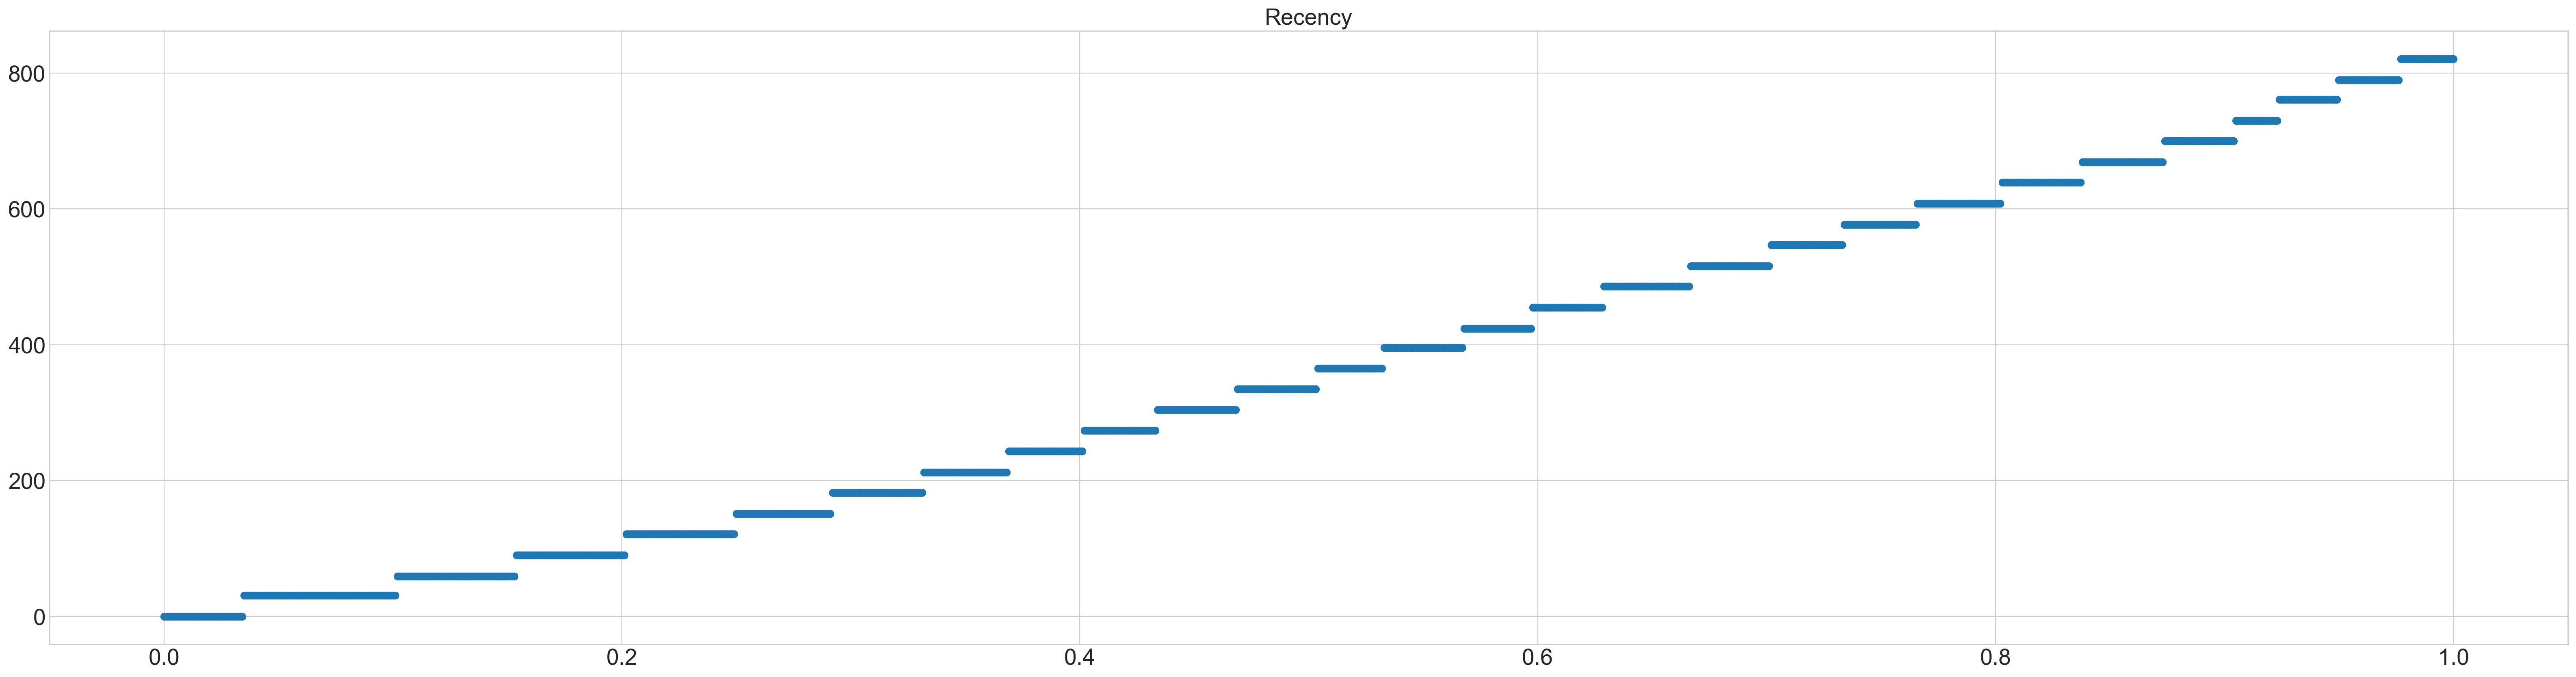

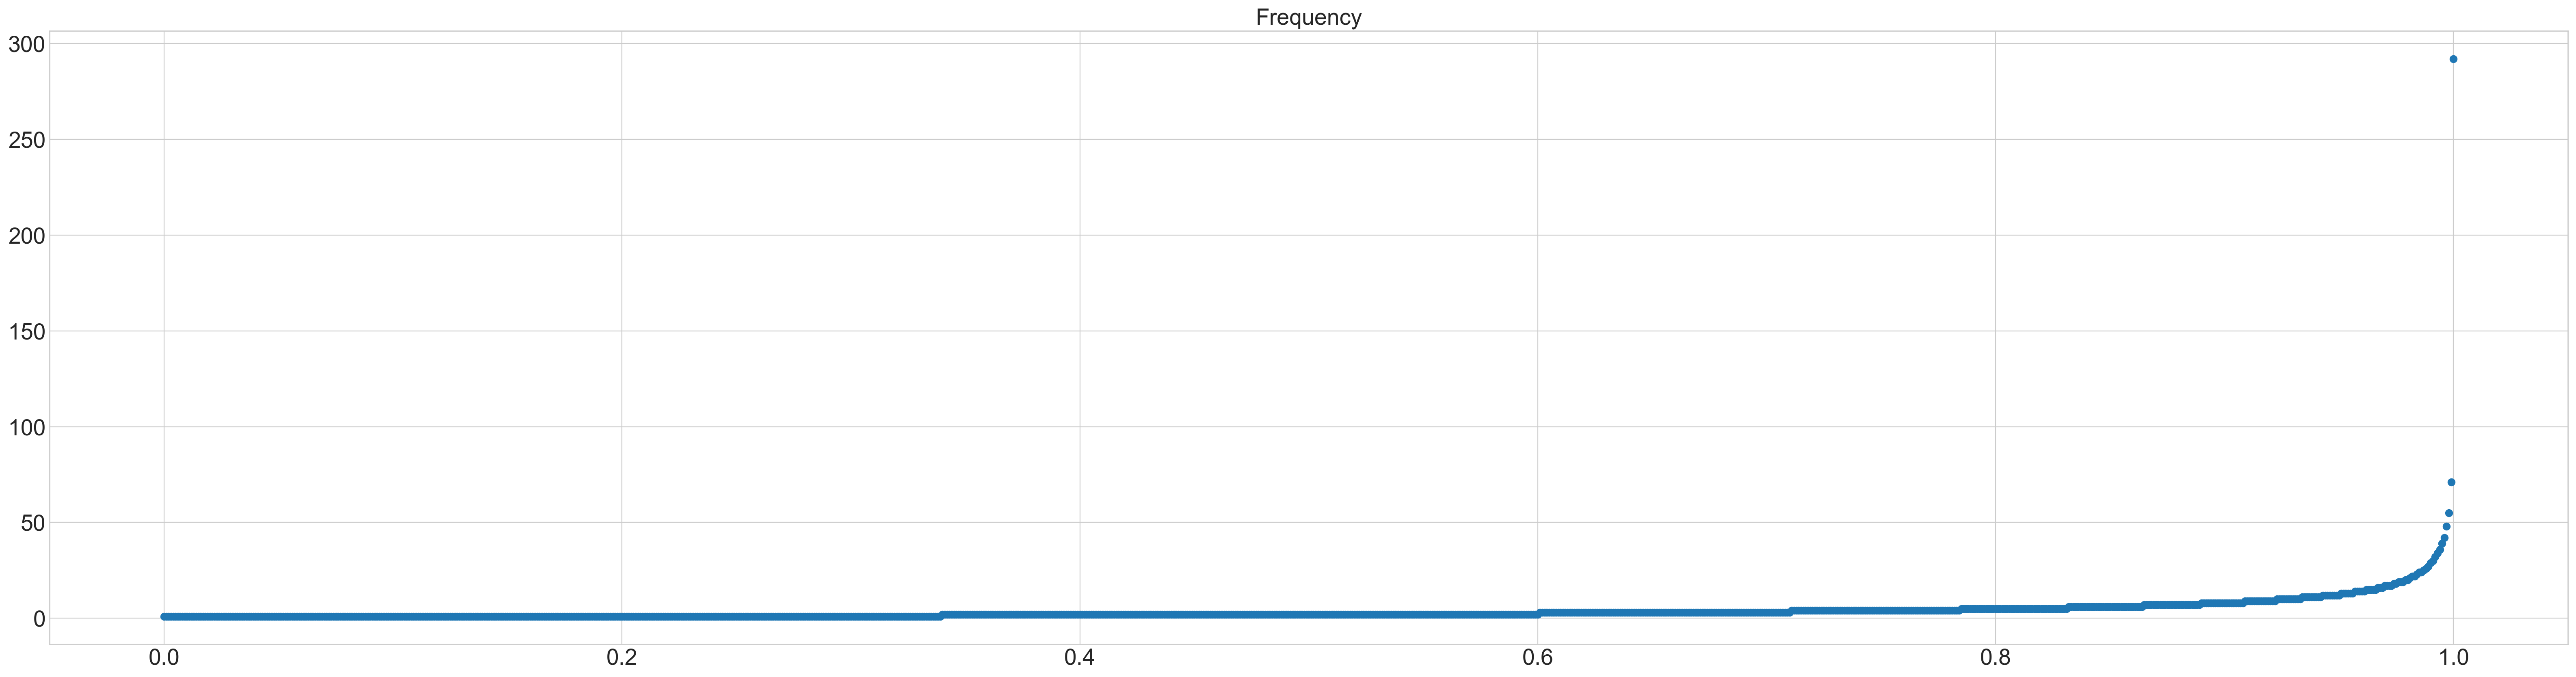

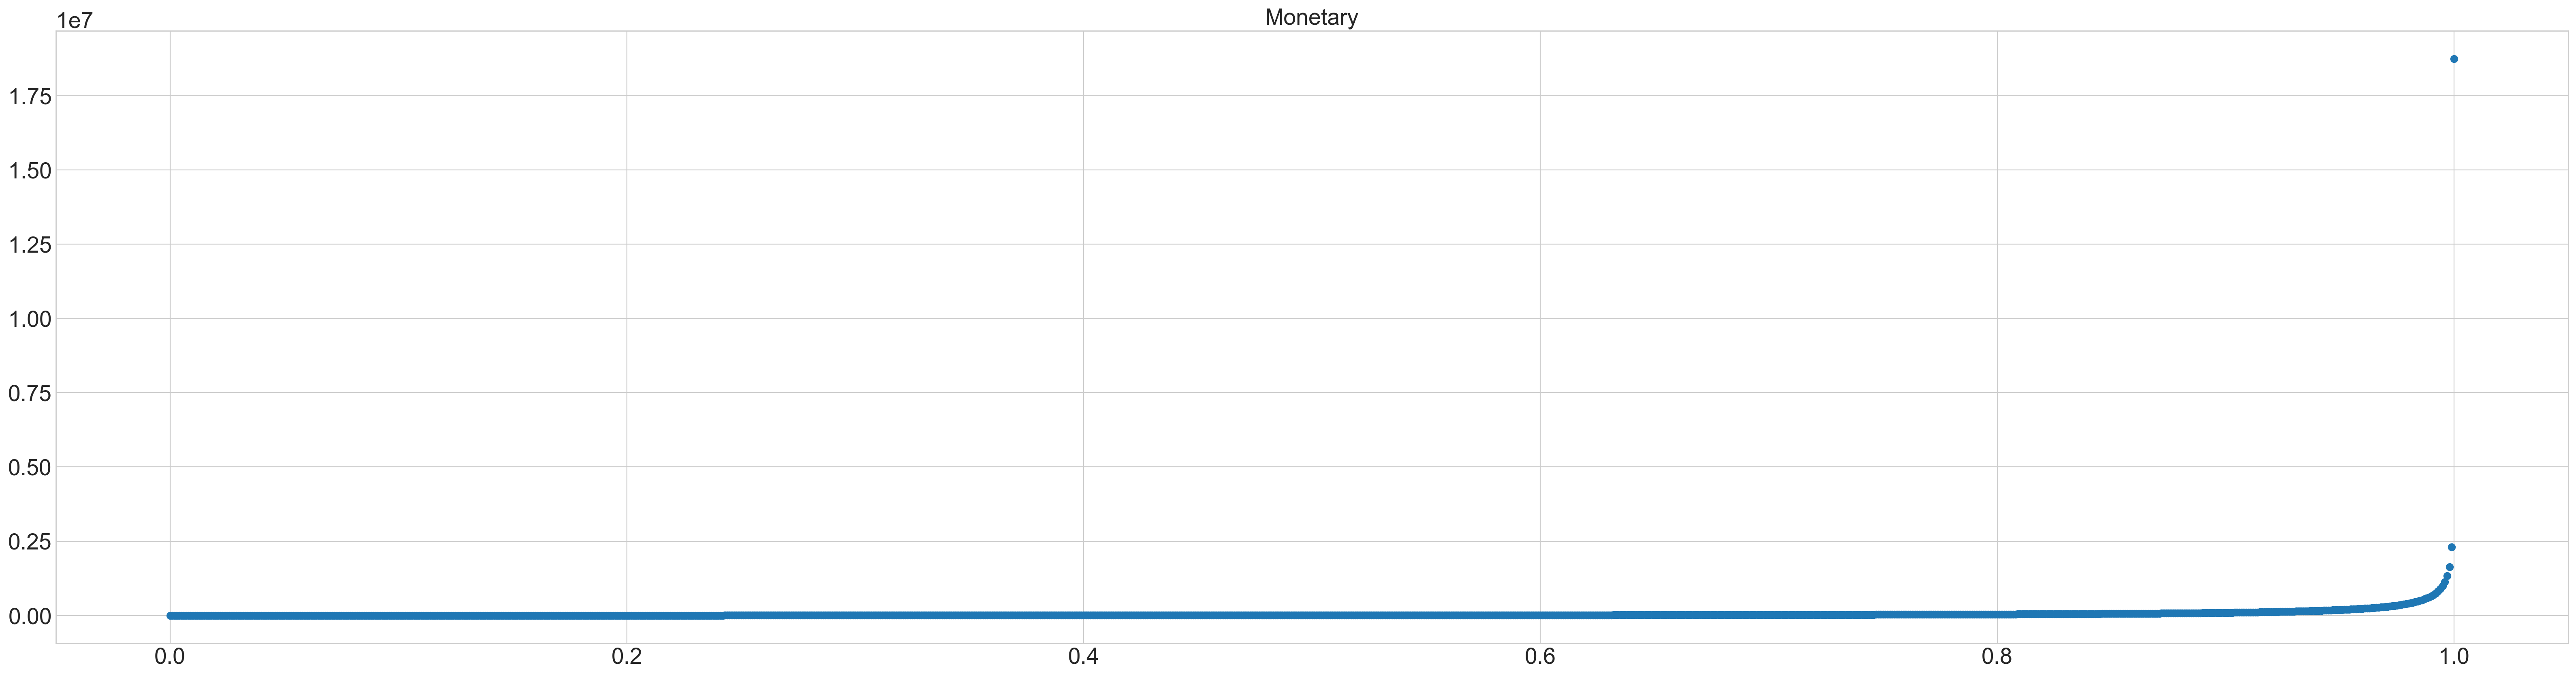

In [31]:
for i in ['Recency', 'Frequency', 'Monetary']:
    print(i)
    fig = plt.figure(figsize = (40, 10), dpi = 200)
    plt.scatter(qt['quantile'], qt[i])
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.title(i, fontsize = 20)

C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

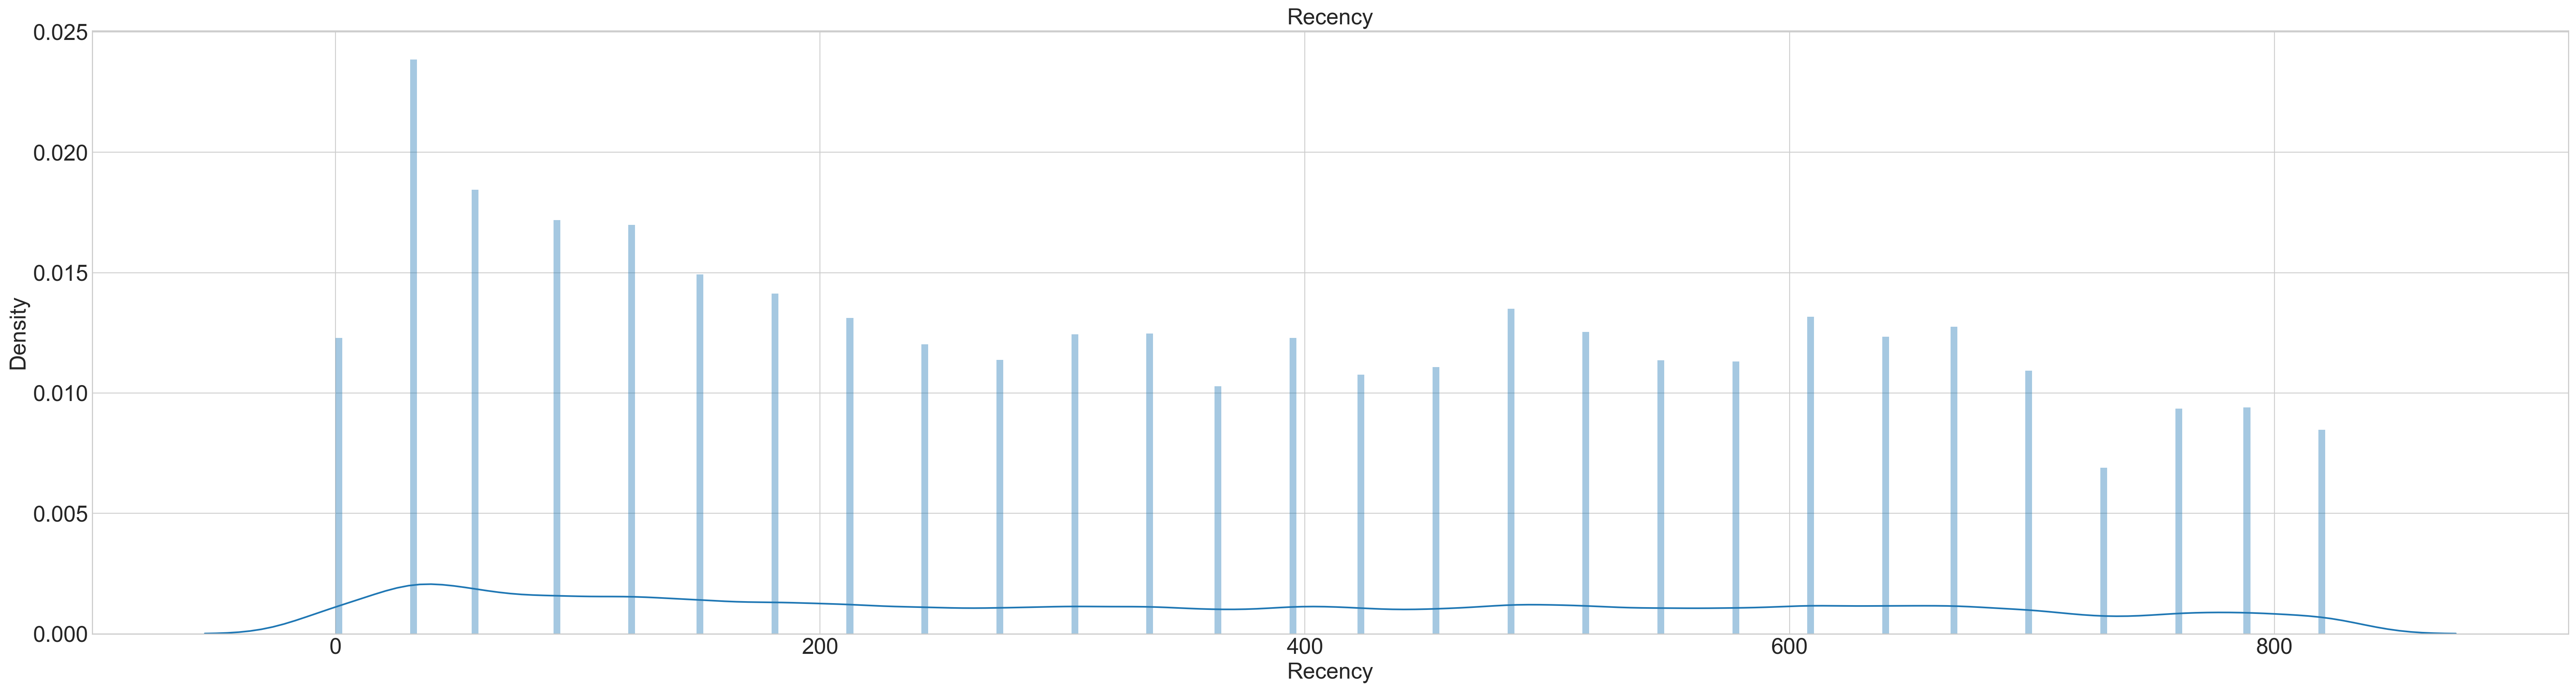

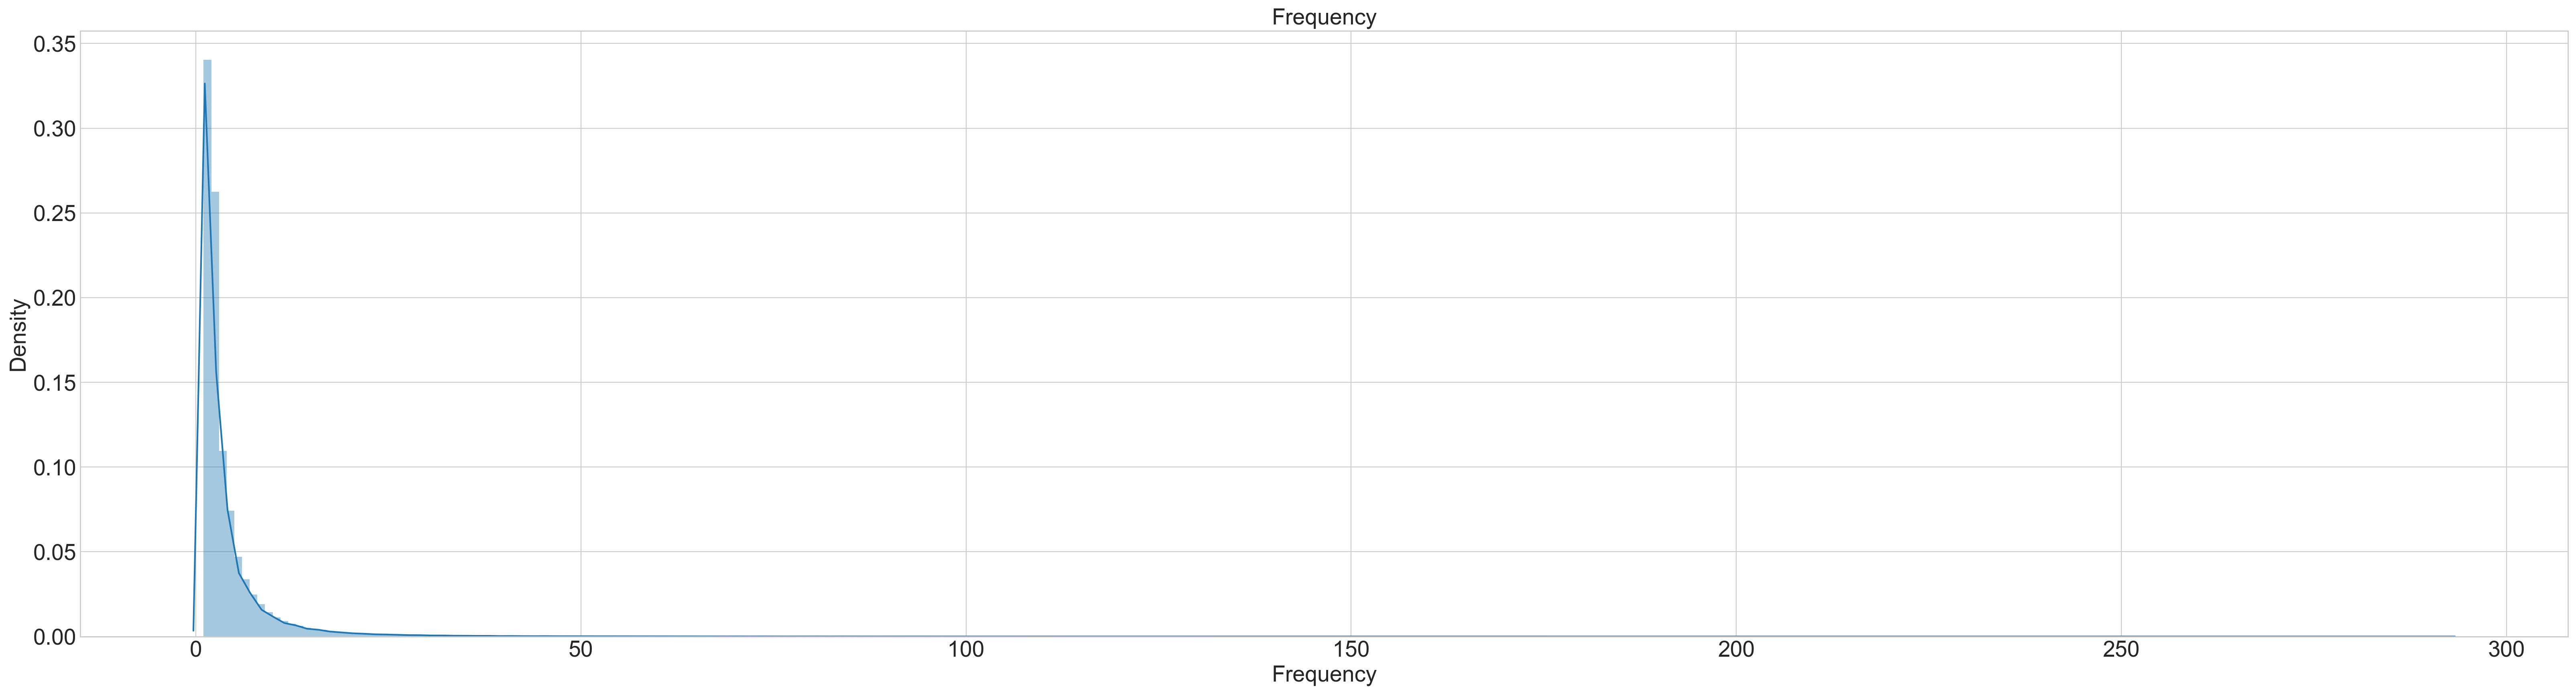

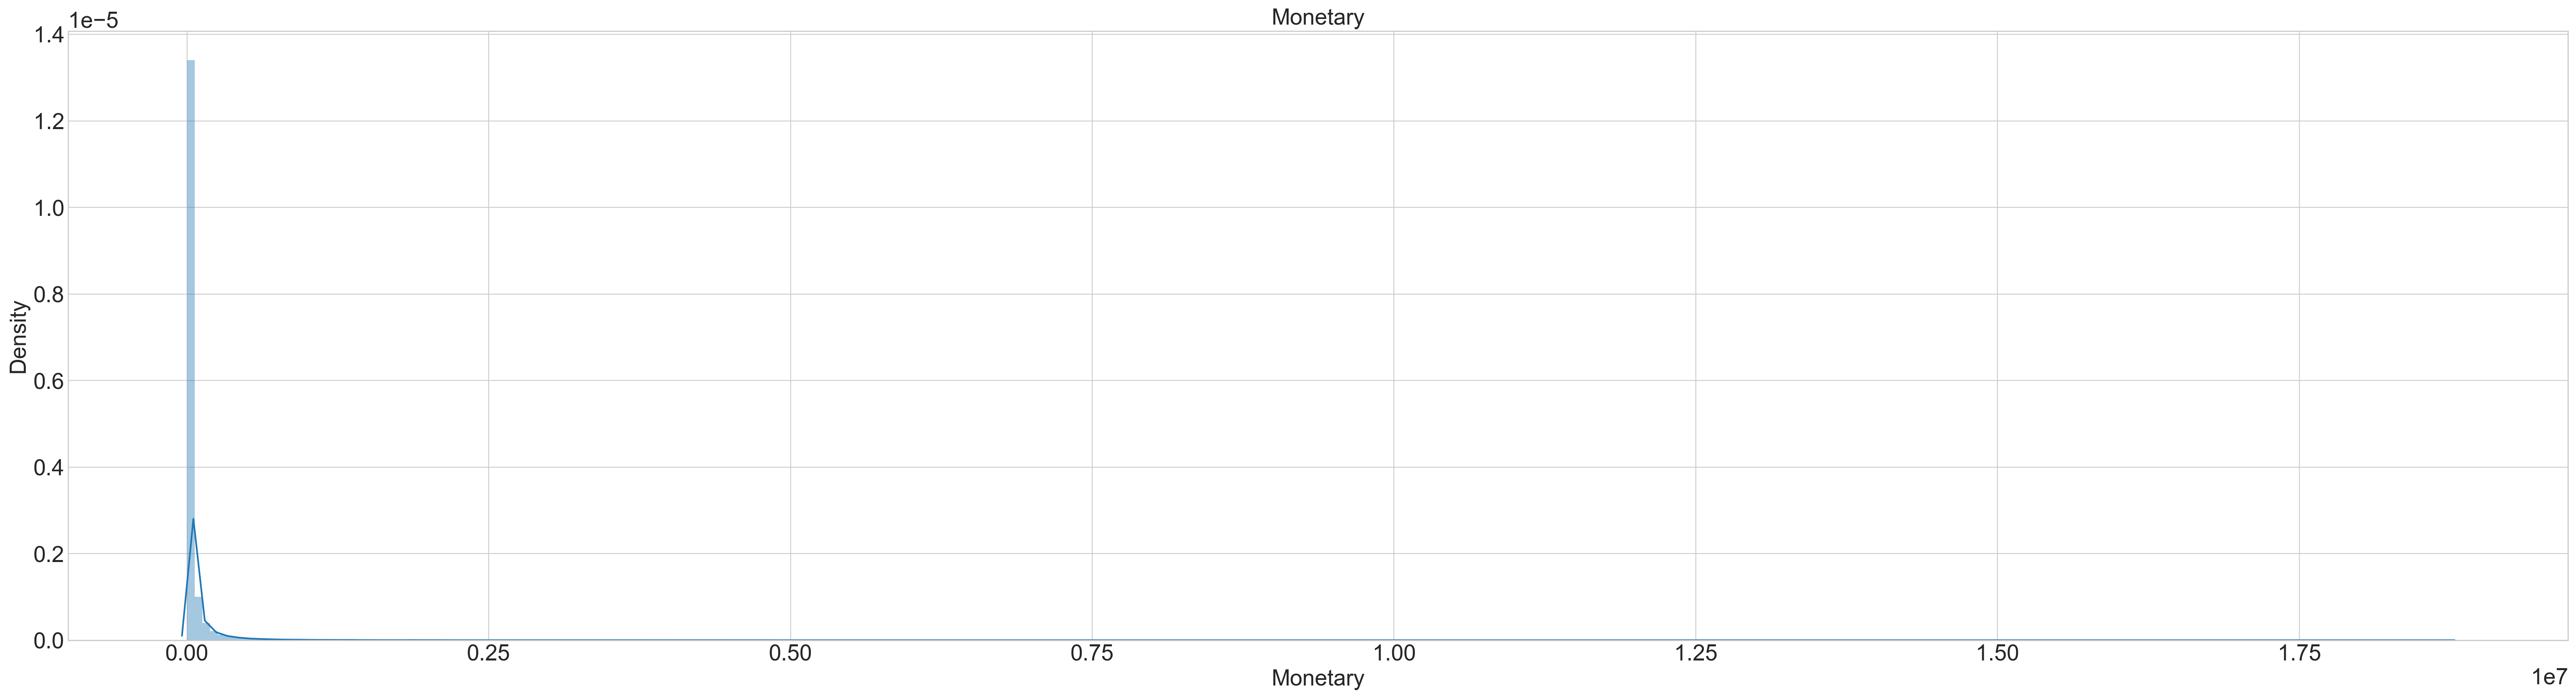

In [32]:
for i in list(rfm_table):
    plt.figure(figsize = (40,10), dpi = 200)
    sns.distplot(rfm_table[i], bins = 292)
    plt.title(i, fontsize = 20)

In [33]:
from scipy import stats
stats.percentileofscore(rfm_table['Frequency'], 10)

92.82012539829375

In [34]:
np.unique(rfm_table['Recency'])

array([  0,  31,  59,  90, 121, 151, 182, 212, 243, 274, 304, 335, 365,
       396, 424, 455, 486, 516, 547, 577, 608, 639, 669, 700, 730, 761,
       790, 821], dtype=int64)

In [35]:
def quantilesegment(rfm_df, t1, t2, t3):
    # RFM Quantiles
    quantilesR = rfm_df.Recency.quantile(q=[0.25,0.5,0.75, 0.9])
    quantilesF = rfm_df.Frequency.quantile(q=[0.25,0.5,0.75,0.9])
    quantilesM = rfm_df.Monetary.quantile(q=[0.25,0.5,0.75,0.95])

    # Let's convert quartile information into a dictionary so that cutoffs can be picked up.
    quantilesR=quantilesR.to_dict()
    quantilesF=quantilesF.to_dict()
    quantilesM=quantilesM.to_dict()
    
    def RScore(t1,x,d):
        if t1 == 'q':
            if x <= d[0.25]:
                return '5'
            elif x <= d[0.50]:
                return '4'
            elif x <= d[0.75]: 
                return '3'
            elif x <= d[0.9]:
                return '2'
            else:
                return '1'
        elif t1 == 'm':
            if x<=31:
                return 'S'
            elif x<= 182:
                return '3'
            elif x<= 365:
                return '2'
            else :
                return '1'

    def FScore(t2,x,d):
        if t2 == 'q':
            if x <= d[0.25]:
                return '1'
            elif x <= d[0.50]:
                return '2'
            elif x <= d[0.75]:
                return '3'
            elif x <= d[0.9]: 
                return '4'
            else:
                return '5'
        elif t2 == 'm':
            if x<= 10 :
                return '1'
            elif x<= 50:
                return '2'
            else :
                return 'S'

    def MScore(t3,x,d):
        if t3 == 'q':
            if x <= d[0.25]:
                return '1'
            elif x <= d[0.50]:
                return '2'
            elif x <= d[0.75]:
                return '3'
            elif x <= d[0.95]: 
                return '4'
            else:
                return '5'
        elif t3 == 'm':
            if x <= 10**3:
                return '1'
            elif x <= 5*(10**3):
                return '2'
            elif x <= 10**4:
                return '3'
            elif x <= 5*(10**4):
                return '4'
            elif x <= 10**5:
                return '5'
            elif x <= 5*(10**5):
                return '6'
            elif x<= 10**6:
                return '7'
            elif x <= 5*(10**6):
                return '8'
            else :
                return 'S'
                
    rfm_segment = rfm_df.copy()
    rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(lambda X: RScore(t1, X, quantilesR))
    rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(lambda X :FScore(t2, X, quantilesF))
    rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(lambda X :MScore(t3,X, quantilesM))

    rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)

    # Reset the index to create a customer_ID column
    # rfm_segment.reset_index(inplace=True)
    rfm_segment.head()
    return rfm_segment

In [36]:
frangelist = [['1', '< 10 piece'], ['2', '10 - 50 piece'], ['S', '> 50 piece']]
frange = pd.DataFrame(frangelist, columns=['F_Quartile' , 'F_range'])
frange

,F_Quartile,F_range
0,1,< 10 piece
1,2,10 - 50 piece
2,S,> 50 piece


In [37]:
rrangelist = [['S', '< 1 month'], ['3', '1 - 6 months'], ['2', '6 - 12 months'], ['1', '> 12 months']]
rrange = pd.DataFrame(rrangelist, columns=['R_Quartile' , 'R_range'])
rrange

,R_Quartile,R_range
0,S,< 1 month
1,3,1 - 6 months
2,2,6 - 12 months
3,1,> 12 months


In [38]:
mrangelist = [['S', '> 5M'], ['8', '1M - 5M'], ['7', '500K - 1M'], ['6', '100K - 500K'],
                ['5', '50K - 100K'], ['4', '10K - 50K'], ['3', '5K - 10K'], ['2', '1K - 5K'], ['1', '<1K']]
mrange = pd.DataFrame(mrangelist, columns=['M_Quartile' , 'M_range'])
mrange

,M_Quartile,M_range
0,S,> 5M
1,8,1M - 5M
2,7,500K - 1M
3,6,100K - 500K
4,5,50K - 100K
5,4,10K - 50K
6,3,5K - 10K
7,2,1K - 5K
8,1,<1K


In [39]:
rfm_segment = quantilesegment(rfm_table, 'm', 'm', 'm').reset_index()
rfm_segment= rfm_segment.merge(sales[['Cust Id', 'Cust Name']]\
    .rename(columns = {'Cust Id' : 'CustomerID'}).drop_duplicates('CustomerID'), how = 'inner', on = 'CustomerID')
rfm_segment = rfm_segment.merge(rrange, how = 'inner', on = 'R_Quartile').merge(frange, how = 'inner', on = 'F_Quartile').merge(mrange, how = 'inner', on = 'M_Quartile')
rfm_segment = rfm_segment[['CustomerID', 'Cust Name', 'Recency', 'Frequency', 'Monetary', 'R_range', 'F_range', 'M_range', 'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFMScore']]

In [40]:
rfmm = rfm_segment

In [41]:
len(list(np.unique(rfmm['RFMScore'])))

80

In [42]:
rfm_segment = rfmm

In [43]:
rfm_segment

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
486445,11301137,พีพี เอ็นจิเนียริ่ง (1988),365,11,3350.28,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222
486446,11309754,บาซิลิโก 2018,304,12,1551.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222
486447,11376746,ณิชาดา หวังซื่อกุล,274,13,4856.72,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222
486448,11388042,สปาร์ค เอ็นจิเนียริ่ง,212,12,4295.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222


In [44]:
rfmm.groupby('RFMScore').count()

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile
RFMScore,,,,,,,,,,,
111,40113,40113,40113,40113,40113,40113,40113,40113,40113,40113,40113
112,62148,62148,62148,62148,62148,62148,62148,62148,62148,62148,62148
113,36089,36089,36089,36089,36089,36089,36089,36089,36089,36089,36089
114,63189,63189,63189,63189,63189,63189,63189,63189,63189,63189,63189
115,12825,12825,12825,12825,12825,12825,12825,12825,12825,12825,12825
...,...,...,...,...,...,...,...,...,...,...,...
SS5,9,9,9,9,9,9,9,9,9,9,9
SS6,191,191,191,191,191,191,191,191,191,191,191
SS7,243,243,243,243,243,243,243,243,243,243,243


In [45]:
rfmcount = rfmm.copy()
rfmcount['count'] = rfmcount['RFMScore']
rfmmcount = rfmcount.groupby('RFMScore')['count'].count().reset_index()
rfmmcount.sort_values(by = 'count')

,RFMScore,count
15,1S6,1
52,3S4,1
16,1S8,2
33,2S6,2
53,3S5,2
...,...,...
39,314,32323
2,113,36089
0,111,40113
1,112,62148


In [46]:
rfm_segment

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
486445,11301137,พีพี เอ็นจิเนียริ่ง (1988),365,11,3350.28,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222
486446,11309754,บาซิลิโก 2018,304,12,1551.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222
486447,11376746,ณิชาดา หวังซื่อกุล,274,13,4856.72,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222
486448,11388042,สปาร์ค เอ็นจิเนียริ่ง,212,12,4295.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222


In [47]:
rfm_segment.sort_values(by ='Monetary', ascending = False)

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore
44,11377644,พันธุ์พิมพ์ ดีเวลลอปเม้นท์,0,139,18744024.68,< 1 month,> 50 piece,> 5M,S,S,S,SSS
20,10380795,ซีคอน โฮม,0,290,15594272.99,< 1 month,> 50 piece,> 5M,S,S,S,SSS
12,10034790,มาสเตอร์แปลน 101,0,124,14933659.50,< 1 month,> 50 piece,> 5M,S,S,S,SSS
80,10750946,เคเอสเค ลมทะเลชาเล่ต์,59,38,14209685.34,1 - 6 months,10 - 50 piece,> 5M,3,2,S,32S
42,11335516,โมเดิร์น เทจ,0,292,11658692.36,< 1 month,> 50 piece,> 5M,S,S,S,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
239570,12259162,น.ส.มุฑิตา กันเม็ด,121,1,2.00,1 - 6 months,< 10 piece,<1K,3,1,1,311
239566,12259046,เกตุวดี,121,1,2.00,1 - 6 months,< 10 piece,<1K,3,1,1,311
274266,11603842,พสิษฐ์ พงศ์ภักพิบูล,608,1,1.00,> 12 months,< 10 piece,<1K,1,1,1,111
227610,12454225,สุธี เจตะวัฒนะ,31,1,0.01,< 1 month,< 10 piece,<1K,S,1,1,S11


In [48]:
rfm_segment.pivot_table(index = ['RFMScore', 'CustomerID'], values = ['Recency', 'Frequency', 'Monetary'])

Frequency    Monetary  Recency
RFMScore CustomerID                                
111      10000124            1      396.00      821
         10000275            1      386.10      608
         10000290            1      735.00      486
         10000316            2      595.00      396
         10000335            1      138.00      730
...                        ...         ...      ...
SSS      11419454          138  5353740.24        0
         11440774           77  9593550.90        0
         11549471           84  7204908.37        0
         11697320           61  5143699.26        0
         11710774           53  7189171.38        0

[486450 rows x 3 columns]

In [49]:
countm = (rfm_segment.groupby('M_Quartile').count()['Monetary']).reset_index().rename(columns={'Monetary':'Count'})
countm

,M_Quartile,Count
0,1,76875
1,2,115935
2,3,69985
3,4,140655
4,5,37078
5,6,38722
6,7,4791
7,8,2320
8,S,89


In [50]:
monm = (rfm_segment.groupby('M_Quartile').sum()['Monetary']).reset_index()
monm

,M_Quartile,Monetary
0,1,3.810295e+07
1,2,3.001768e+08
2,3,5.158252e+08
3,4,3.300877e+09
4,5,2.607197e+09
5,6,8.037403e+09
6,7,3.278007e+09
7,8,3.968808e+09
8,S,6.561523e+08


In [51]:
avm = monm.merge(countm, how = 'inner', on = 'M_Quartile')
avm['AverageMillion'] = avm.Monetary/avm.Count
avm['Average'] = avm.AverageMillion
avm.sort_values(by = 'Average', ascending= False, inplace = True)
avm['Cumulative Monetary'] = avm.Monetary.cumsum()
avm

,M_Quartile,Monetary,Count,AverageMillion,Average,Cumulative Monetary
8,S,6.561523e+08,89,7.372497e+06,7.372497e+06,6.561523e+08
7,8,3.968808e+09,2320,1.710693e+06,1.710693e+06,4.624961e+09
6,7,3.278007e+09,4791,6.842010e+05,6.842010e+05,7.902967e+09
5,6,8.037403e+09,38722,2.075668e+05,2.075668e+05,1.594037e+10
4,5,2.607197e+09,37078,7.031654e+04,7.031654e+04,1.854757e+10
3,4,3.300877e+09,140655,2.346789e+04,2.346789e+04,2.184844e+10
2,3,5.158252e+08,69985,7.370511e+03,7.370511e+03,2.236427e+10
1,2,3.001768e+08,115935,2.589182e+03,2.589182e+03,2.266445e+10
0,1,3.810295e+07,76875,4.956481e+02,4.956481e+02,2.270255e+10


In [52]:
rfm_segment['Recency'].max()

821

<BarContainer object of 9 artists>

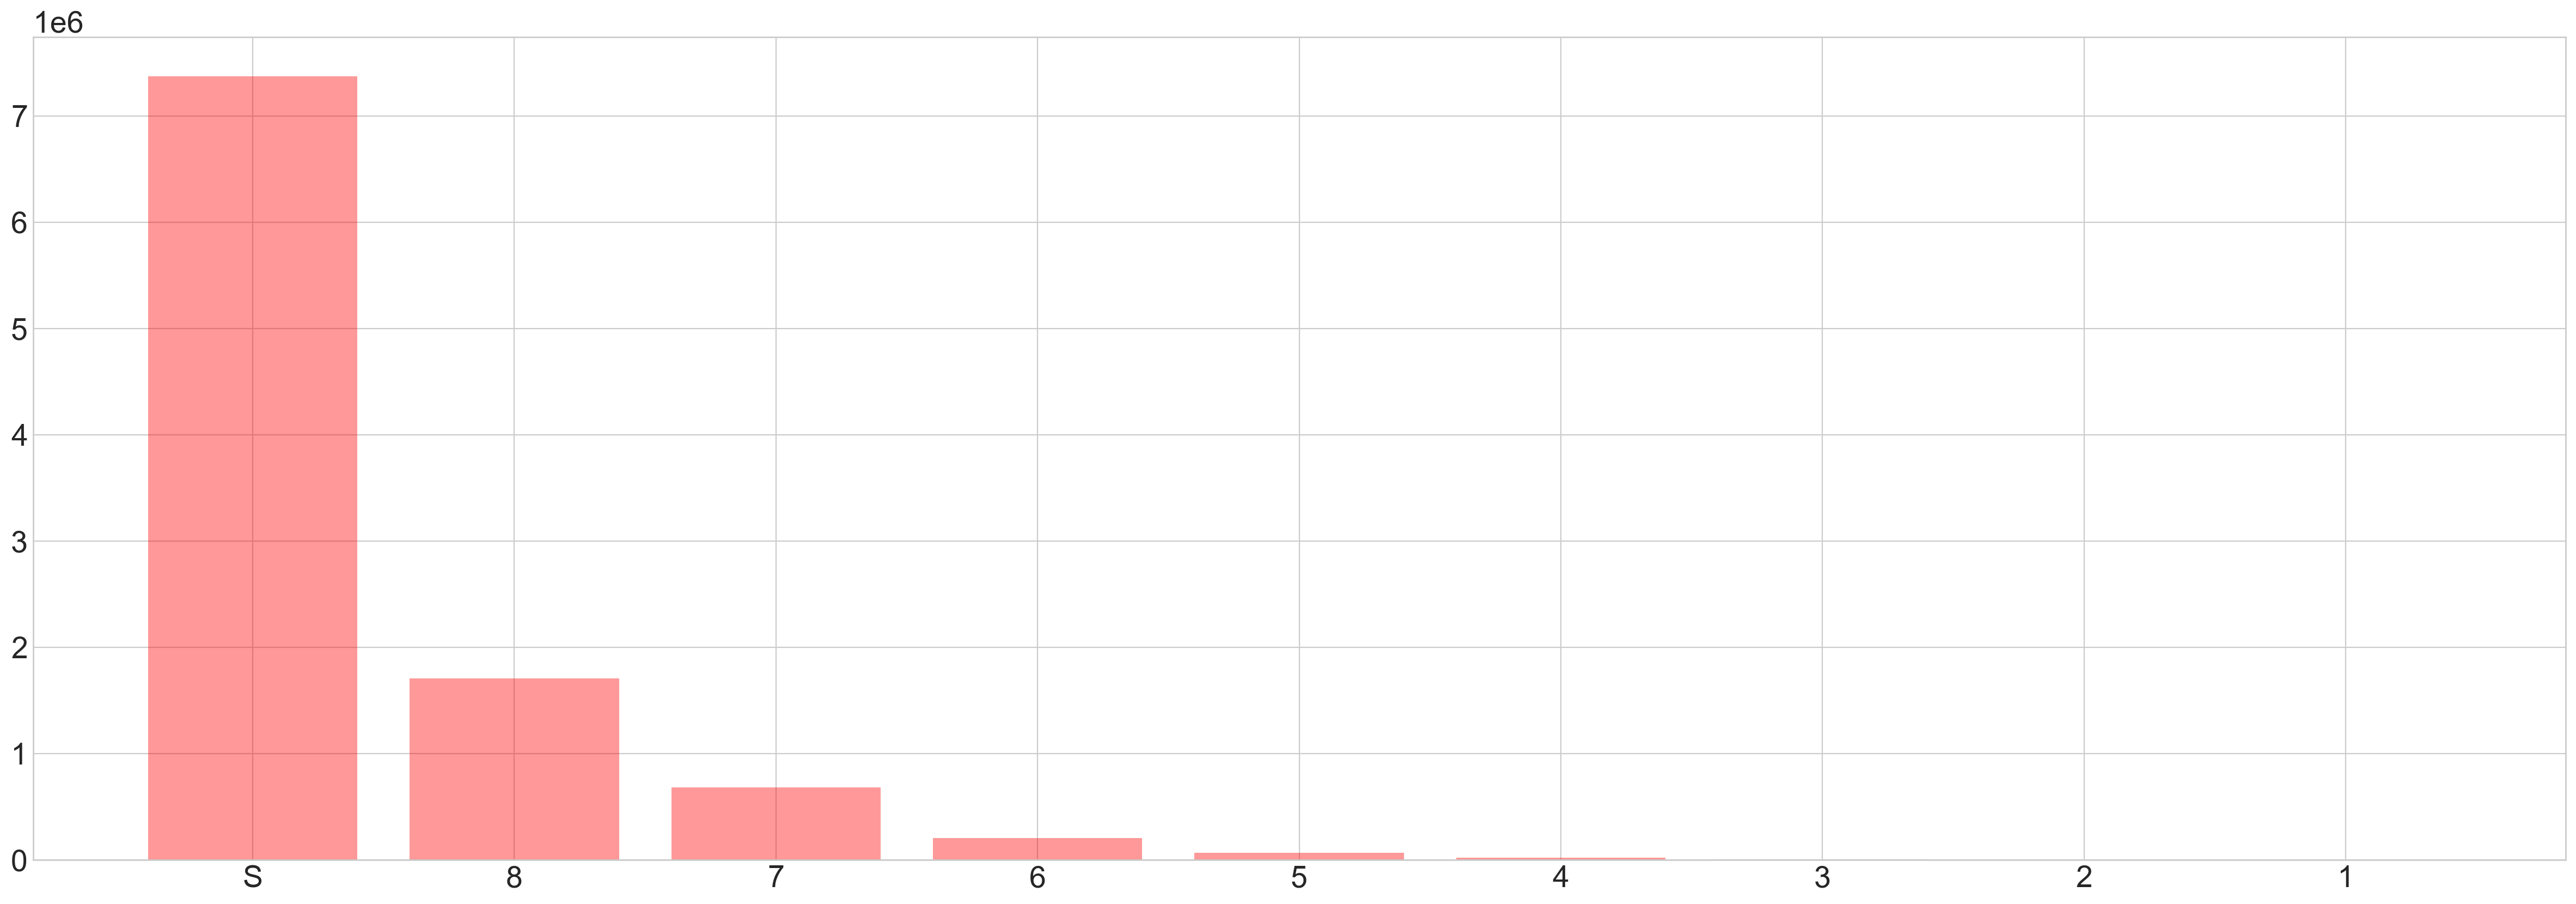

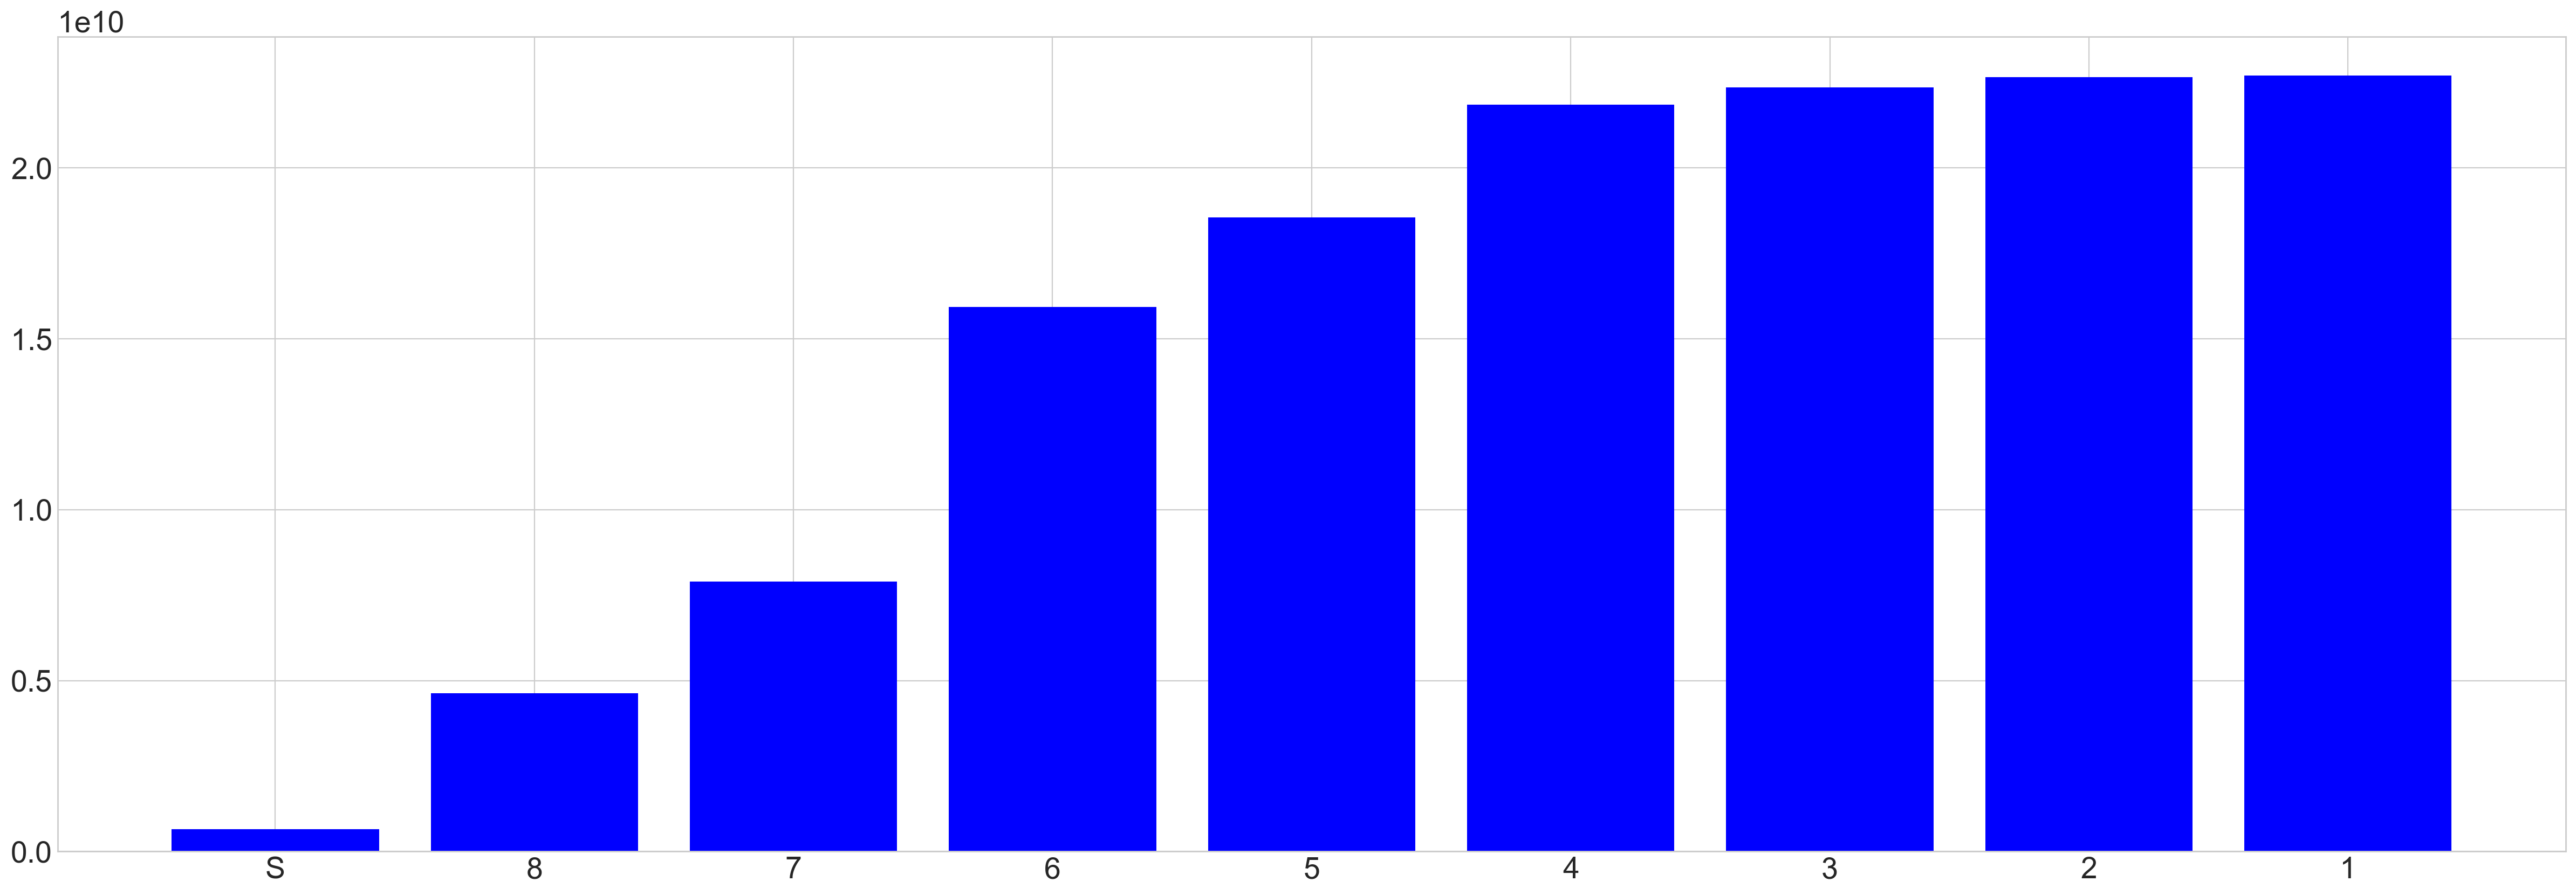

In [53]:
fig = plt.figure(figsize = (30, 10), dpi = 200)
plt.bar(avm['M_Quartile'], avm['Average'], alpha = 0.4, color = 'red')
fig2 = plt.figure(figsize = (30, 10), dpi = 200)
plt.bar(avm['M_Quartile'], avm['Cumulative Monetary'], color = 'blue')

In [54]:
summm = avm.sort_values(by = 'Average', ascending= False)[['M_Quartile', 'Monetary']]
summm['Cumulative Monetary'] = summm.Monetary.cumsum()
summm

,M_Quartile,Monetary,Cumulative Monetary
8,S,6.561523e+08,6.561523e+08
7,8,3.968808e+09,4.624961e+09
6,7,3.278007e+09,7.902967e+09
5,6,8.037403e+09,1.594037e+10
4,5,2.607197e+09,1.854757e+10
3,4,3.300877e+09,2.184844e+10
2,3,5.158252e+08,2.236427e+10
1,2,3.001768e+08,2.266445e+10
0,1,3.810295e+07,2.270255e+10


In [55]:
rfm_segment

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
486445,11301137,พีพี เอ็นจิเนียริ่ง (1988),365,11,3350.28,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222
486446,11309754,บาซิลิโก 2018,304,12,1551.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222
486447,11376746,ณิชาดา หวังซื่อกุล,274,13,4856.72,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222
486448,11388042,สปาร์ค เอ็นจิเนียริ่ง,212,12,4295.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222


In [56]:
rfm_segment_big = rfm_segment[(rfm_segment['R_Quartile'].isin(['S', '3','2','1']))\
                                &(rfm_segment['M_Quartile'].isin(['S', '8', '7', '6', '5']))
]
rfm_segment_big

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
82995,11902543,อ่อนนุชทำดี การาจ,212,11,63266.00,6 - 12 months,10 - 50 piece,50K - 100K,2,2,5,225
82996,11903901,นุสรา รามนัฏ,212,11,64055.60,6 - 12 months,10 - 50 piece,50K - 100K,2,2,5,225
82997,11906361,อติพร สุวรรณ,212,11,85441.88,6 - 12 months,10 - 50 piece,50K - 100K,2,2,5,225
82998,11917275,เดียบอน พีซี,212,12,55405.36,6 - 12 months,10 - 50 piece,50K - 100K,2,2,5,225


In [57]:
# determine criteria for each segment
diamond = ['SSS']
loyal = ['S2S', 'S21',
        '3SS', '32S', '31S',
        '3S8', '328', '318',
        'SS8', 'S28', 'S18']
def mergef(X):
    y = []
    for j in X:
        for i in ['S', '2', '1']:
            z = j[0]+i+j[1]
            y.append(z)
    return y
cantlose = mergef(['1S', '2S'])
promising = mergef(['S7', 'S6', 'S5', '37', '36', '35'])
needattention = mergef(['28', '27', '26', '25'])
lost = mergef(['18', '17', '16' ,'15'])
mainexceed = diamond + loyal + cantlose + promising + needattention + lost
main = [k for k in mainexceed if k in np.unique(rfm_segment.RFMScore)]
others = [k for k in np.unique(rfm_segment.RFMScore) if k not in mainexceed]

In [58]:
alltype = [(diamond, 'diamond'), (loyal, 'loyal'), (cantlose, 'cantlose'), (promising, 'promising'), (needattention, 'needattention'), (lost, 'lost'), (others, 'others')]
listsegmentdf = []
segmentdf = pd.DataFrame([])
for i, j in alltype:
    listsegmentdf.append(pd.DataFrame(i, columns= ['RFMScore']).assign(Segment = j))
    segmentdf = pd.concat([segmentdf, pd.DataFrame(i, columns= ['RFMScore']).assign(Segment = j) ])
segmentdf

,RFMScore,Segment
0,SSS,diamond
0,S2S,loyal
1,S21,loyal
2,3SS,loyal
3,32S,loyal
...,...,...
25,S14,others
26,S22,others
27,S23,others
28,S24,others


In [59]:
segmentdf.pivot_table(index = ['Segment', 'RFMScore']).to_csv('segmentdf.csv')

In [60]:
rfm_segment = rfm_segment.merge(segmentdf, how = 'inner', on = 'RFMScore')
rfm_segment

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486445,11301137,พีพี เอ็นจิเนียริ่ง (1988),365,11,3350.28,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486446,11309754,บาซิลิโก 2018,304,12,1551.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486447,11376746,ณิชาดา หวังซื่อกุล,274,13,4856.72,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486448,11388042,สปาร์ค เอ็นจิเนียริ่ง,212,12,4295.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others


In [61]:
rfm_segment[rfm_segment['Segment'] == 'cantlose']

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
85,10181296,ศุภเดช พูนพิพัฒน์,304,32,6782576.02,6 - 12 months,10 - 50 piece,> 5M,2,2,S,22S,cantlose
86,11462901,จี.ไอ.อินดัสทรี,212,18,5602726.95,6 - 12 months,10 - 50 piece,> 5M,2,2,S,22S,cantlose
87,11504359,สุวัฒน์ ชัยสันติตระกูล,304,29,11584219.65,6 - 12 months,10 - 50 piece,> 5M,2,2,S,22S,cantlose
88,11531189,บริษัท โปรเกรส พี เพาเวอร์ จำกัด,335,32,6965323.48,6 - 12 months,10 - 50 piece,> 5M,2,2,S,22S,cantlose


In [62]:
(rfm_segment.groupby('R_Quartile').agg('count').reset_index()[['R_Quartile', 'CustomerID']].set_index('R_Quartile')*100/rfm_segment.CustomerID.count()).reset_index().sort_values(by = 'CustomerID')

,R_Quartile,CustomerID
3,S,10.162607
1,2,20.165896
2,3,22.958577
0,1,46.712920


In [63]:
(rfm_segment.groupby('M_Quartile').agg('count').reset_index()[['M_Quartile', 'CustomerID']].set_index('M_Quartile')*100/rfm_segment.CustomerID.count()).reset_index().sort_values(by = 'CustomerID')

,M_Quartile,CustomerID
8,S,0.018296
7,8,0.476925
6,7,0.984891
4,5,7.622161
5,6,7.960119
2,3,14.386885
0,1,15.803269
1,2,23.832871
3,4,28.914585


In [64]:
(rfm_segment.groupby('F_Quartile').agg('count').reset_index()[['F_Quartile', 'CustomerID']].set_index('F_Quartile')*100/rfm_segment.CustomerID.count()).reset_index().sort_values(by = 'CustomerID')

,F_Quartile,CustomerID
2,S,0.258814
1,2,6.359955
0,1,93.381231


In [65]:
def SEGMENTvalue(table, segment):
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    if segment not in np.unique(table['Segment']):
        print('not found')
        exit()
    print('----------------------------------------------------------------------')
    print('SEGMENT : ' + segment)
    table2 = table[table['Segment'] == segment].sort_values('Monetary', ascending =False)
    print('number of Customer : ' + str(table2.CustomerID.count()))
    print('sum monetary : ' + str((table.Monetary.sum()/(10**6)).round(2)) + ' million')
    print('-----------------------------------------------------------------------')
    print('sum monetary by segment : ' + str((table2.Monetary.sum()).round(2)) )
    print('min monetary by segment : ' + str((table2.Monetary.min()).round(2)) )
    print('max monetary by segment : ' + str((table2.Monetary.max()).round(2)) )
    print('average monetary by segment : ' + str((table2.Monetary.sum()/table2.CustomerID.count()).round(2)))
    print('---------------------------- million unit -------------------------')
    print('sum monetary by segment : ' + str((table2.Monetary.sum()/(10**6)).round(2)) + ' million')
    print('min monetary by segment : ' + str((table2.Monetary.min()/(10**6)).round(2)) + ' million')
    print('max monetary by segment : ' + str((table2.Monetary.max()/(10**6)).round(2)) + ' million')
    print('average monetary by segment : ' + str(((table2.Monetary.sum()/table2.CustomerID.count())/(10**6)).round(2)) + ' million')
    print('-----------------------------------------------------------------------')
    print('percent monetary : ' + str(((table2.Monetary.sum()/table.Monetary.sum())*100).round(2)) + ' %')
    print('percent of customers : ' + str(((table2.CustomerID.count()/table.CustomerID.count())*100).round(4)) + ' %')
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    #return(table2.head())

for i in np.unique(rfm_segment.Segment):
    print(SEGMENTvalue(rfm_segment.reset_index(), i))

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
----------------------------------------------------------------------
SEGMENT : cantlose
number of Customer : 4
sum monetary : 22702.55 million
-----------------------------------------------------------------------
sum monetary by segment : 30934846.1
min monetary by segment : 5602726.95
max monetary by segment : 11584219.65
average monetary by segment : 7733711.52
---------------------------- million unit -------------------------
sum monetary by segment : 30.93 million
min monetary by segment : 5.6 million
max monetary by segment : 11.58 million
average monetary by segment : 7.73 million
-----------------------------------------------------------------------
percent monetary : 0.14 %
percent of customers : 0.0008 %
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
None
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [66]:
R = 'S'
F = 'S'
M = 'S'

def RFMvalue(table, R, F, M):
    number = str(R)+ str(F) + str(M)
    print('----------------------------------------------------------------------')
    print('SEGMENT : ' + number)
    table2 = table[table['RFMScore'] == number].sort_values('Monetary', ascending =False)
    print('number of Customer : ' + str(table2.CustomerID.count()))
    print('sum monetary : ' + str((table.Monetary.sum()/(10**6)).round(2)) + ' million')
    print('-----------------------------------------------------------------------')
    print('sum monetary by segment : ' + str((table2.Monetary.sum()).round(2)) )
    print('min monetary by segment : ' + str((table2.Monetary.min()).round(2)) )
    print('max monetary by segment : ' + str((table2.Monetary.max()).round(2)) )
    print('---------------------------- million unit -------------------------')
    print('sum monetary by segment : ' + str((table2.Monetary.sum()/(10**6)).round(2)) + ' million')
    print('min monetary by segment : ' + str((table2.Monetary.min()/(10**6)).round(2)) + ' million')
    print('max monetary by segment : ' + str((table2.Monetary.max()/(10**6)).round(2)) + ' million')
    print('-----------------------------------------------------------------------')
    print('percent monetary : ' + str(((table2.Monetary.sum()/table.Monetary.sum())*100).round(2)) + ' %')
    print('percent of customers : ' + str(((table2.CustomerID.count()/table.CustomerID.count())*100).round(4)) + ' %')
    return(table2.head(3))

RFMvalue(rfm_segment.reset_index(), R,F,M)

----------------------------------------------------------------------
SEGMENT : SSS
number of Customer : 56
sum monetary : 22702.55 million
-----------------------------------------------------------------------
sum monetary by segment : 414579116.01
min monetary by segment : 5052919.26
max monetary by segment : 18744024.68
---------------------------- million unit -------------------------
sum monetary by segment : 414.58 million
min monetary by segment : 5.05 million
max monetary by segment : 18.74 million
-----------------------------------------------------------------------
percent monetary : 1.83 %
percent of customers : 0.0115 %


,index,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
44,44,11377644,พันธุ์พิมพ์ ดีเวลลอปเม้นท์,0,139,18744024.68,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
20,20,10380795,ซีคอน โฮม,0,290,15594272.99,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
12,12,10034790,มาสเตอร์แปลน 101,0,124,14933659.50,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond


In [67]:
rfm_segment[['Monetary', 'M_Quartile']].groupby('M_Quartile').describe()

Monetary                                                        \
               count          mean           std         min           25%   
M_Quartile                                                                   
1            76875.0  4.956481e+02  2.868986e+02        0.01  2.480000e+02   
2           115935.0  2.589182e+03  1.119591e+03     1000.08  1.611965e+03   
3            69985.0  7.370511e+03  1.512137e+03     5000.16  5.999000e+03   
4           140655.0  2.346789e+04  1.086039e+04    10000.30  1.421200e+04   
5            37078.0  7.031654e+04  1.411396e+04    50001.73  5.799000e+04   
6            38722.0  2.075668e+05  9.900058e+04   100006.93  1.287851e+05   
7             4791.0  6.842010e+05  1.372882e+05   500008.96  5.669608e+05   
8             2320.0  1.710693e+06  7.672517e+05  1000002.69  1.174608e+06   
S               89.0  7.372497e+06  2.524378e+06  5052919.26  5.419860e+06   

                                                    
                    50%           75%          max  
M_Quartile                                          
1               476.850  7.390000e+02      1000.00  
2              2390.000  3.456380e+03      5000.00  
3              7240.000  8.690000e+03     10000.00  
4             20431.600  3.099000e+04     50000.00  
5             67985.230  8.141473e+04    100000.00  
6            175015.580  2.608301e+05    499943.00  
7            653707.120  7.827692e+05    999664.93  
8           1429723.625  1.966305e+06   4989375.22  
S           6836945.790  8.247719e+06  18744024.68

In [68]:
rfm_segment.pivot_table(index = ['Segment', 'RFMScore'], values = ['Recency', 'Frequency', 'Monetary'], aggfunc= ['mean', 'min', 'max', 'count'])

mean                                 min  \
                     Frequency      Monetary     Recency Frequency   
Segment   RFMScore                                                   
cantlose  22S        27.750000  7.733712e+06  288.750000        18   
diamond   SSS       111.982143  7.403199e+06    3.321429        53   
lost      115         4.602339  6.924557e+04  575.623548         1   
          116         5.654987  1.786557e+05  566.391304         1   
          117         6.538745  6.467979e+05  560.645756         1   
...                        ...           ...         ...       ...   
promising S26        20.840025  2.493941e+05   18.295730        11   
          S27        26.068940  6.961986e+05   18.131208        11   
          SS5        59.222222  8.108689e+04   20.666667        51   
          SS6        64.471204  3.166937e+05   13.308901        51   
          SS7        69.069959  7.277870e+05   12.246914        51   

                                             max                       \
                      Monetary Recency Frequency     Monetary Recency   
Segment   RFMScore                                                      
cantlose  22S       5602726.95     212        32  11584219.65     335   
diamond   SSS       5052919.26       0       292  18744024.68      31   
lost      115         50002.00     396        10    100000.00     821   
          116        100010.00     396        10    499943.00     821   
          117        500359.60     396        10    991944.00     821   
...                        ...     ...       ...          ...     ...   
promising S26        100072.64       0        50    499578.64      31   
          S27        500636.44       0        50    999271.21      31   
          SS5         52607.24       0        91     99535.06      31   
          SS6        103824.26       0       195    499865.89      31   
          SS7        500808.95       0       163    999372.12      31   

                       count                   
                   Frequency Monetary Recency  
Segment   RFMScore                             
cantlose  22S              4        4       4  
diamond   SSS             56       56      56  
lost      115          12825    12825   12825  
          116           7820     7820    7820  
          117            271      271     271  
...                      ...      ...     ...  
promising S26           4707     4707    4707  
          S27           1349     1349    1349  
          SS5              9        9       9  
          SS6            191      191     191  
          SS7            243      243     243  

[80 rows x 12 columns]

In [69]:
rfm_segment.groupby('RFMScore')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'min', 'max', 'count']).round().reset_index()

RFMScore Recency                  Frequency                   Monetary  \
               mean  min  max  count      mean min  max  count       mean   
0       111   612.0  396  821  40113       1.0   1    7  40113      503.0   
1       112   603.0  396  821  62148       2.0   1   10  62148     2578.0   
2       113   599.0  396  821  36089       2.0   1   10  36089     7364.0   
3       114   588.0  396  821  63189       3.0   1   10  63189    22878.0   
4       115   576.0  396  821  12825       5.0   1   10  12825    69246.0   
..      ...     ...  ...  ...    ...       ...  ..  ...    ...        ...   
75      SS5    21.0    0   31      9      59.0  51   91      9    81087.0   
76      SS6    13.0    0   31    191      64.0  51  195    191   316694.0   
77      SS7    12.0    0   31    243      69.0  51  163    243   727787.0   
78      SS8    11.0    0   31    476      79.0  51  204    476  2143044.0   
79      SSS     3.0    0   31     56     112.0  53  292     56  7403199.0   

                                  
          min         max  count  
0         1.0      1000.0  40113  
1      1000.0      5000.0  62148  
2      5000.0     10000.0  36089  
3     10000.0     50000.0  63189  
4     50002.0    100000.0  12825  
..        ...         ...    ...  
75    52607.0     99535.0      9  
76   103824.0    499866.0    191  
77   500809.0    999372.0    243  
78  1005966.0   4989375.0    476  
79  5052919.0  18744025.0     56  

[80 rows x 13 columns]

In [70]:
rfm_segment.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'min', 'max', 'count']).round().reset_index()

Segment Recency                   Frequency                   \
                    mean  min  max   count      mean min  max   count   
0       cantlose   289.0  212  335       4      28.0  18   32       4   
1        diamond     3.0    0   31      56     112.0  53  292      56   
2           lost   562.0  396  821   25111       7.0   1  110   25111   
3          loyal    44.0    0  182    1959      43.0   2  204    1959   
4  needattention   284.0  212  365   16096       9.0   1   85   16096   
5         others   386.0    0  821  403450       2.0   1   67  403450   
6      promising    75.0    0  182   39774      12.0   1  195   39774   

    Monetary                                 
        mean        min         max   count  
0  7733712.0  5602727.0  11584220.0       4  
1  7403199.0  5052919.0  18744025.0      56  
2   144984.0    50002.0   3833623.0   25111  
3  1830548.0  1000474.0  14209685.0    1959  
4   180387.0    50002.0   4979833.0   16096  
5    10299.0        0.0     50000.0  403450  
6   200428.0    50005.0    999665.0   39774

In [71]:
rfm_segment

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486445,11301137,พีพี เอ็นจิเนียริ่ง (1988),365,11,3350.28,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486446,11309754,บาซิลิโก 2018,304,12,1551.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486447,11376746,ณิชาดา หวังซื่อกุล,274,13,4856.72,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486448,11388042,สปาร์ค เอ็นจิเนียริ่ง,212,12,4295.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others


['1', '2', '3', '4', '5', '6', '7', '8', 'S']


{'whiskers': [<matplotlib.lines.Line2D at 0x19e067acbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x19e067bc190>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e067ac8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x19e067bc730>,
 'fliers': [<matplotlib.lines.Line2D at 0x19e067bca00>,
 'means': []}

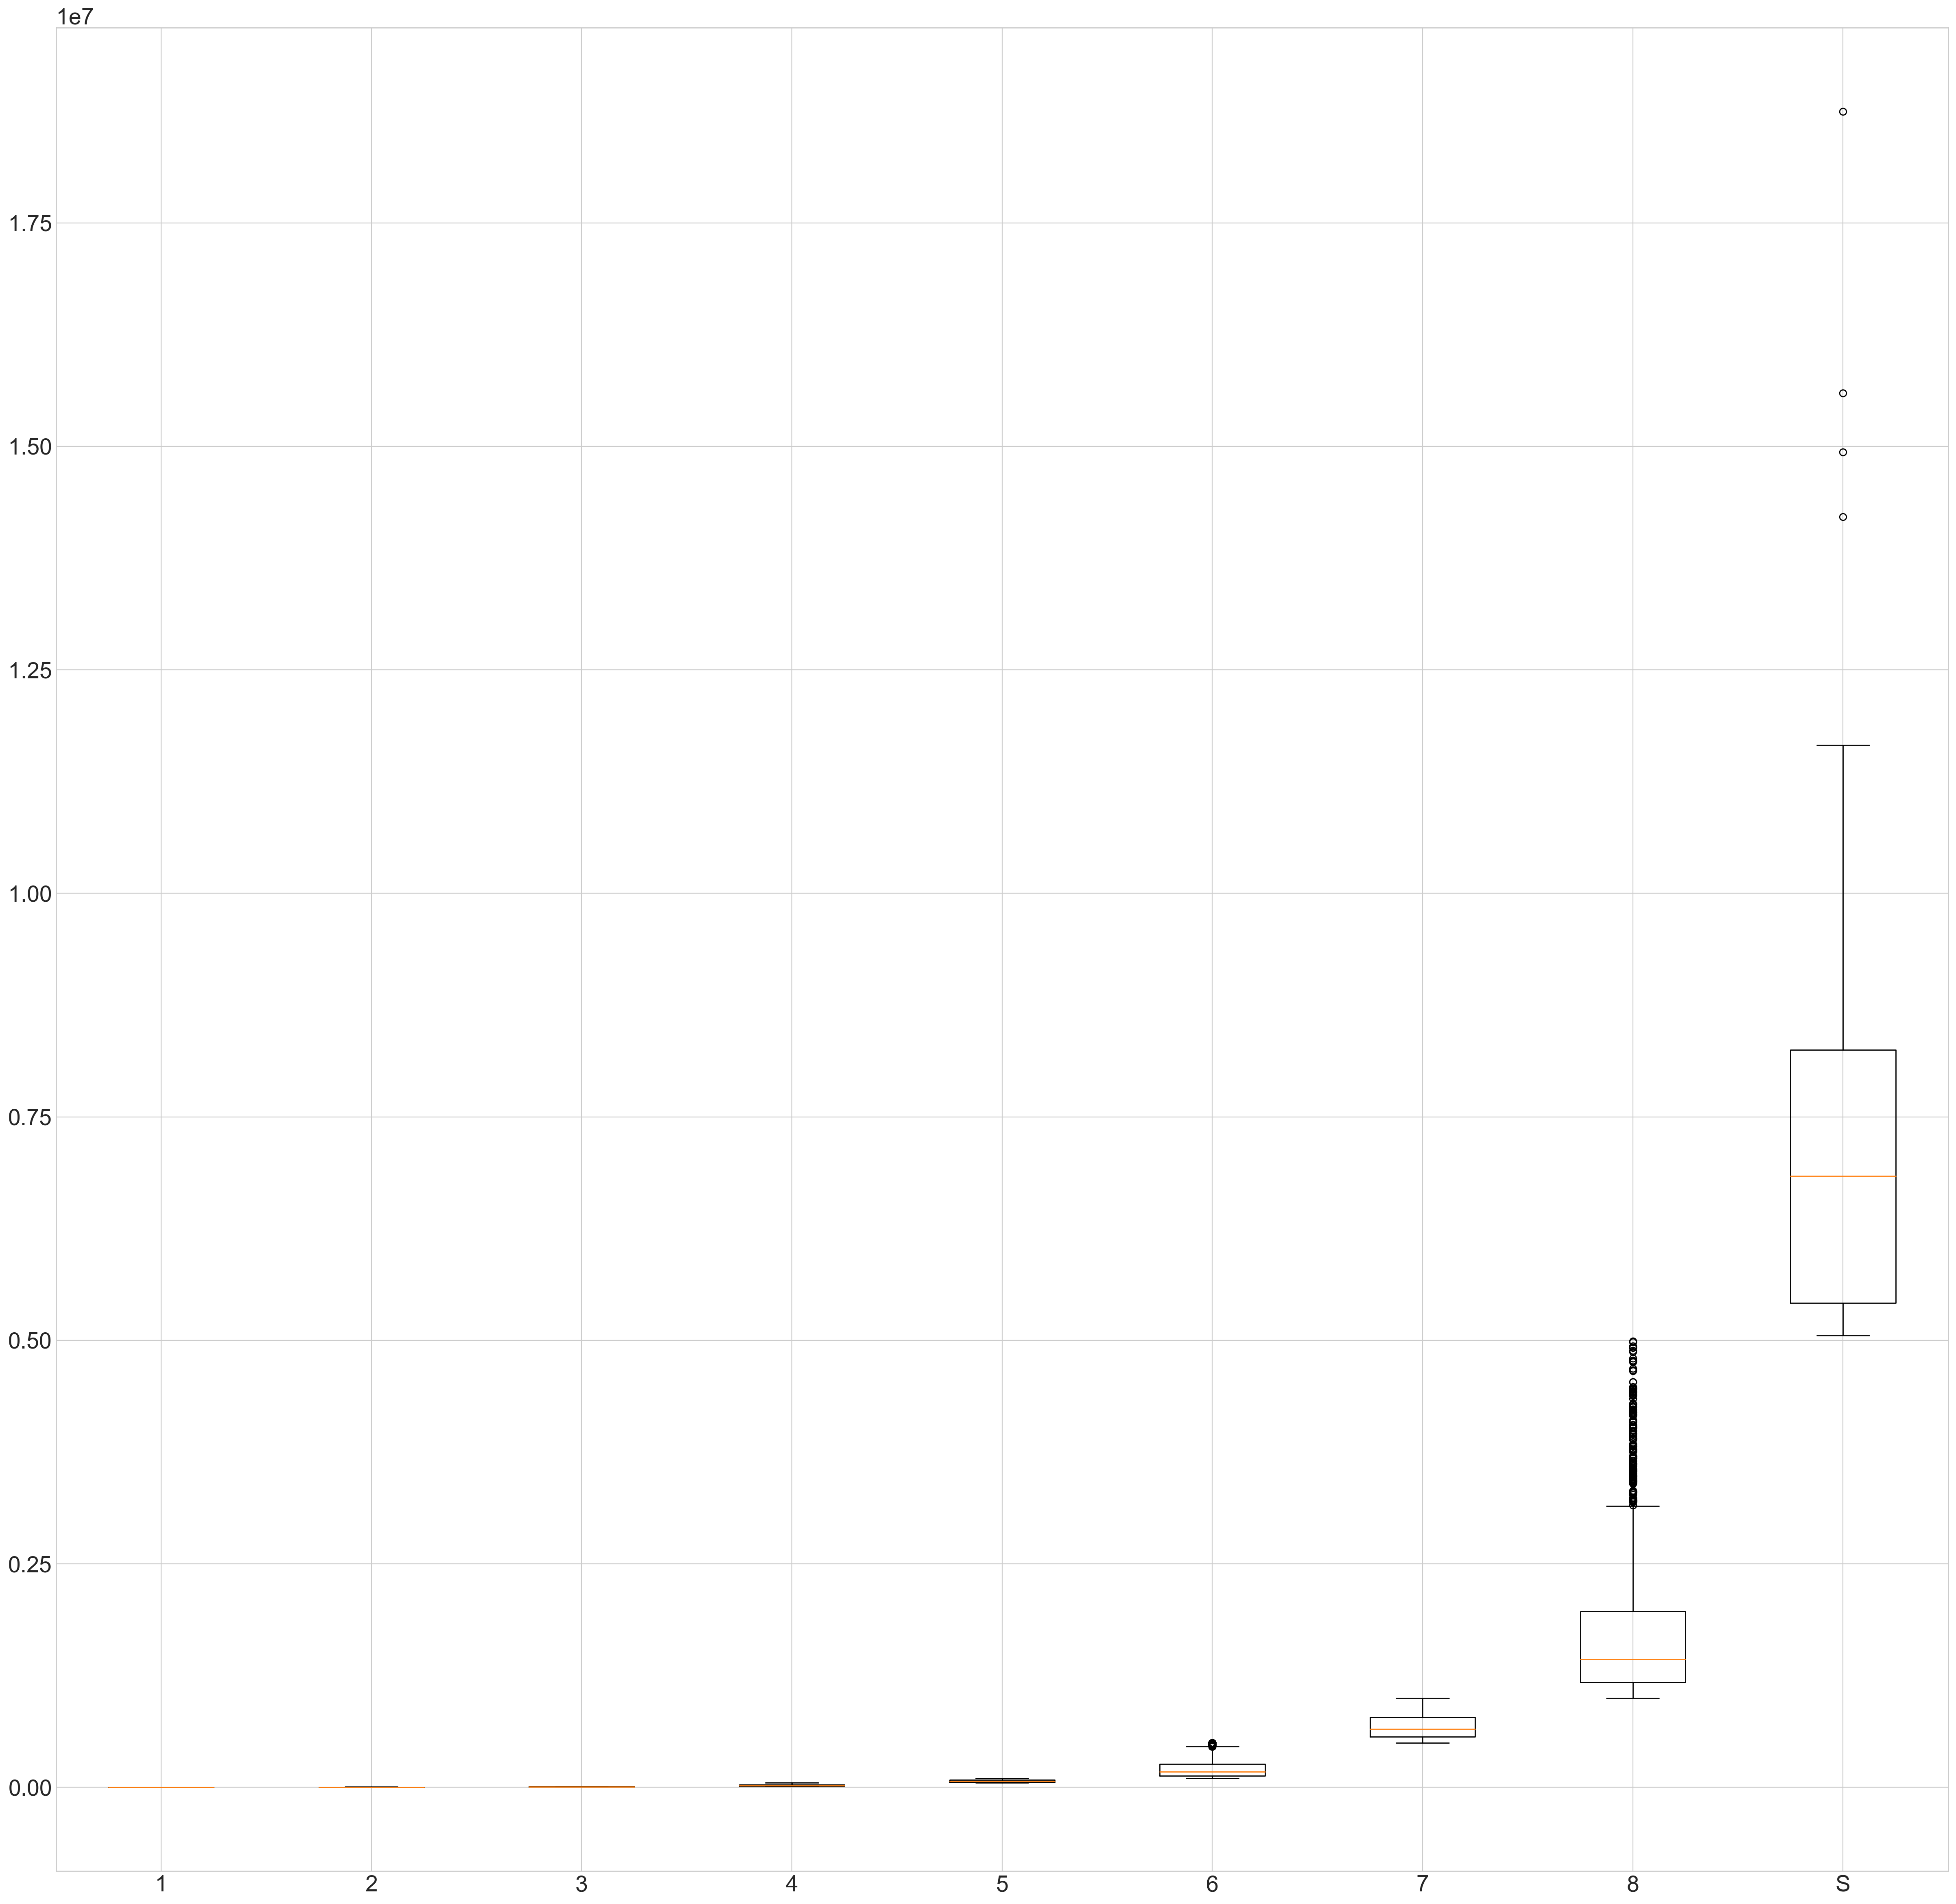

In [72]:
lists = []
listl = []
for i in np.unique(rfm_segment['M_Quartile']):
    lists.append(rfm_segment[rfm_segment['M_Quartile'] == i]['Monetary'])
    listl.append(i)
print(listl)
fig = plt.figure(figsize = (30,30), dpi = 200)
ax = fig.gca()
ax.boxplot(lists, labels = listl)

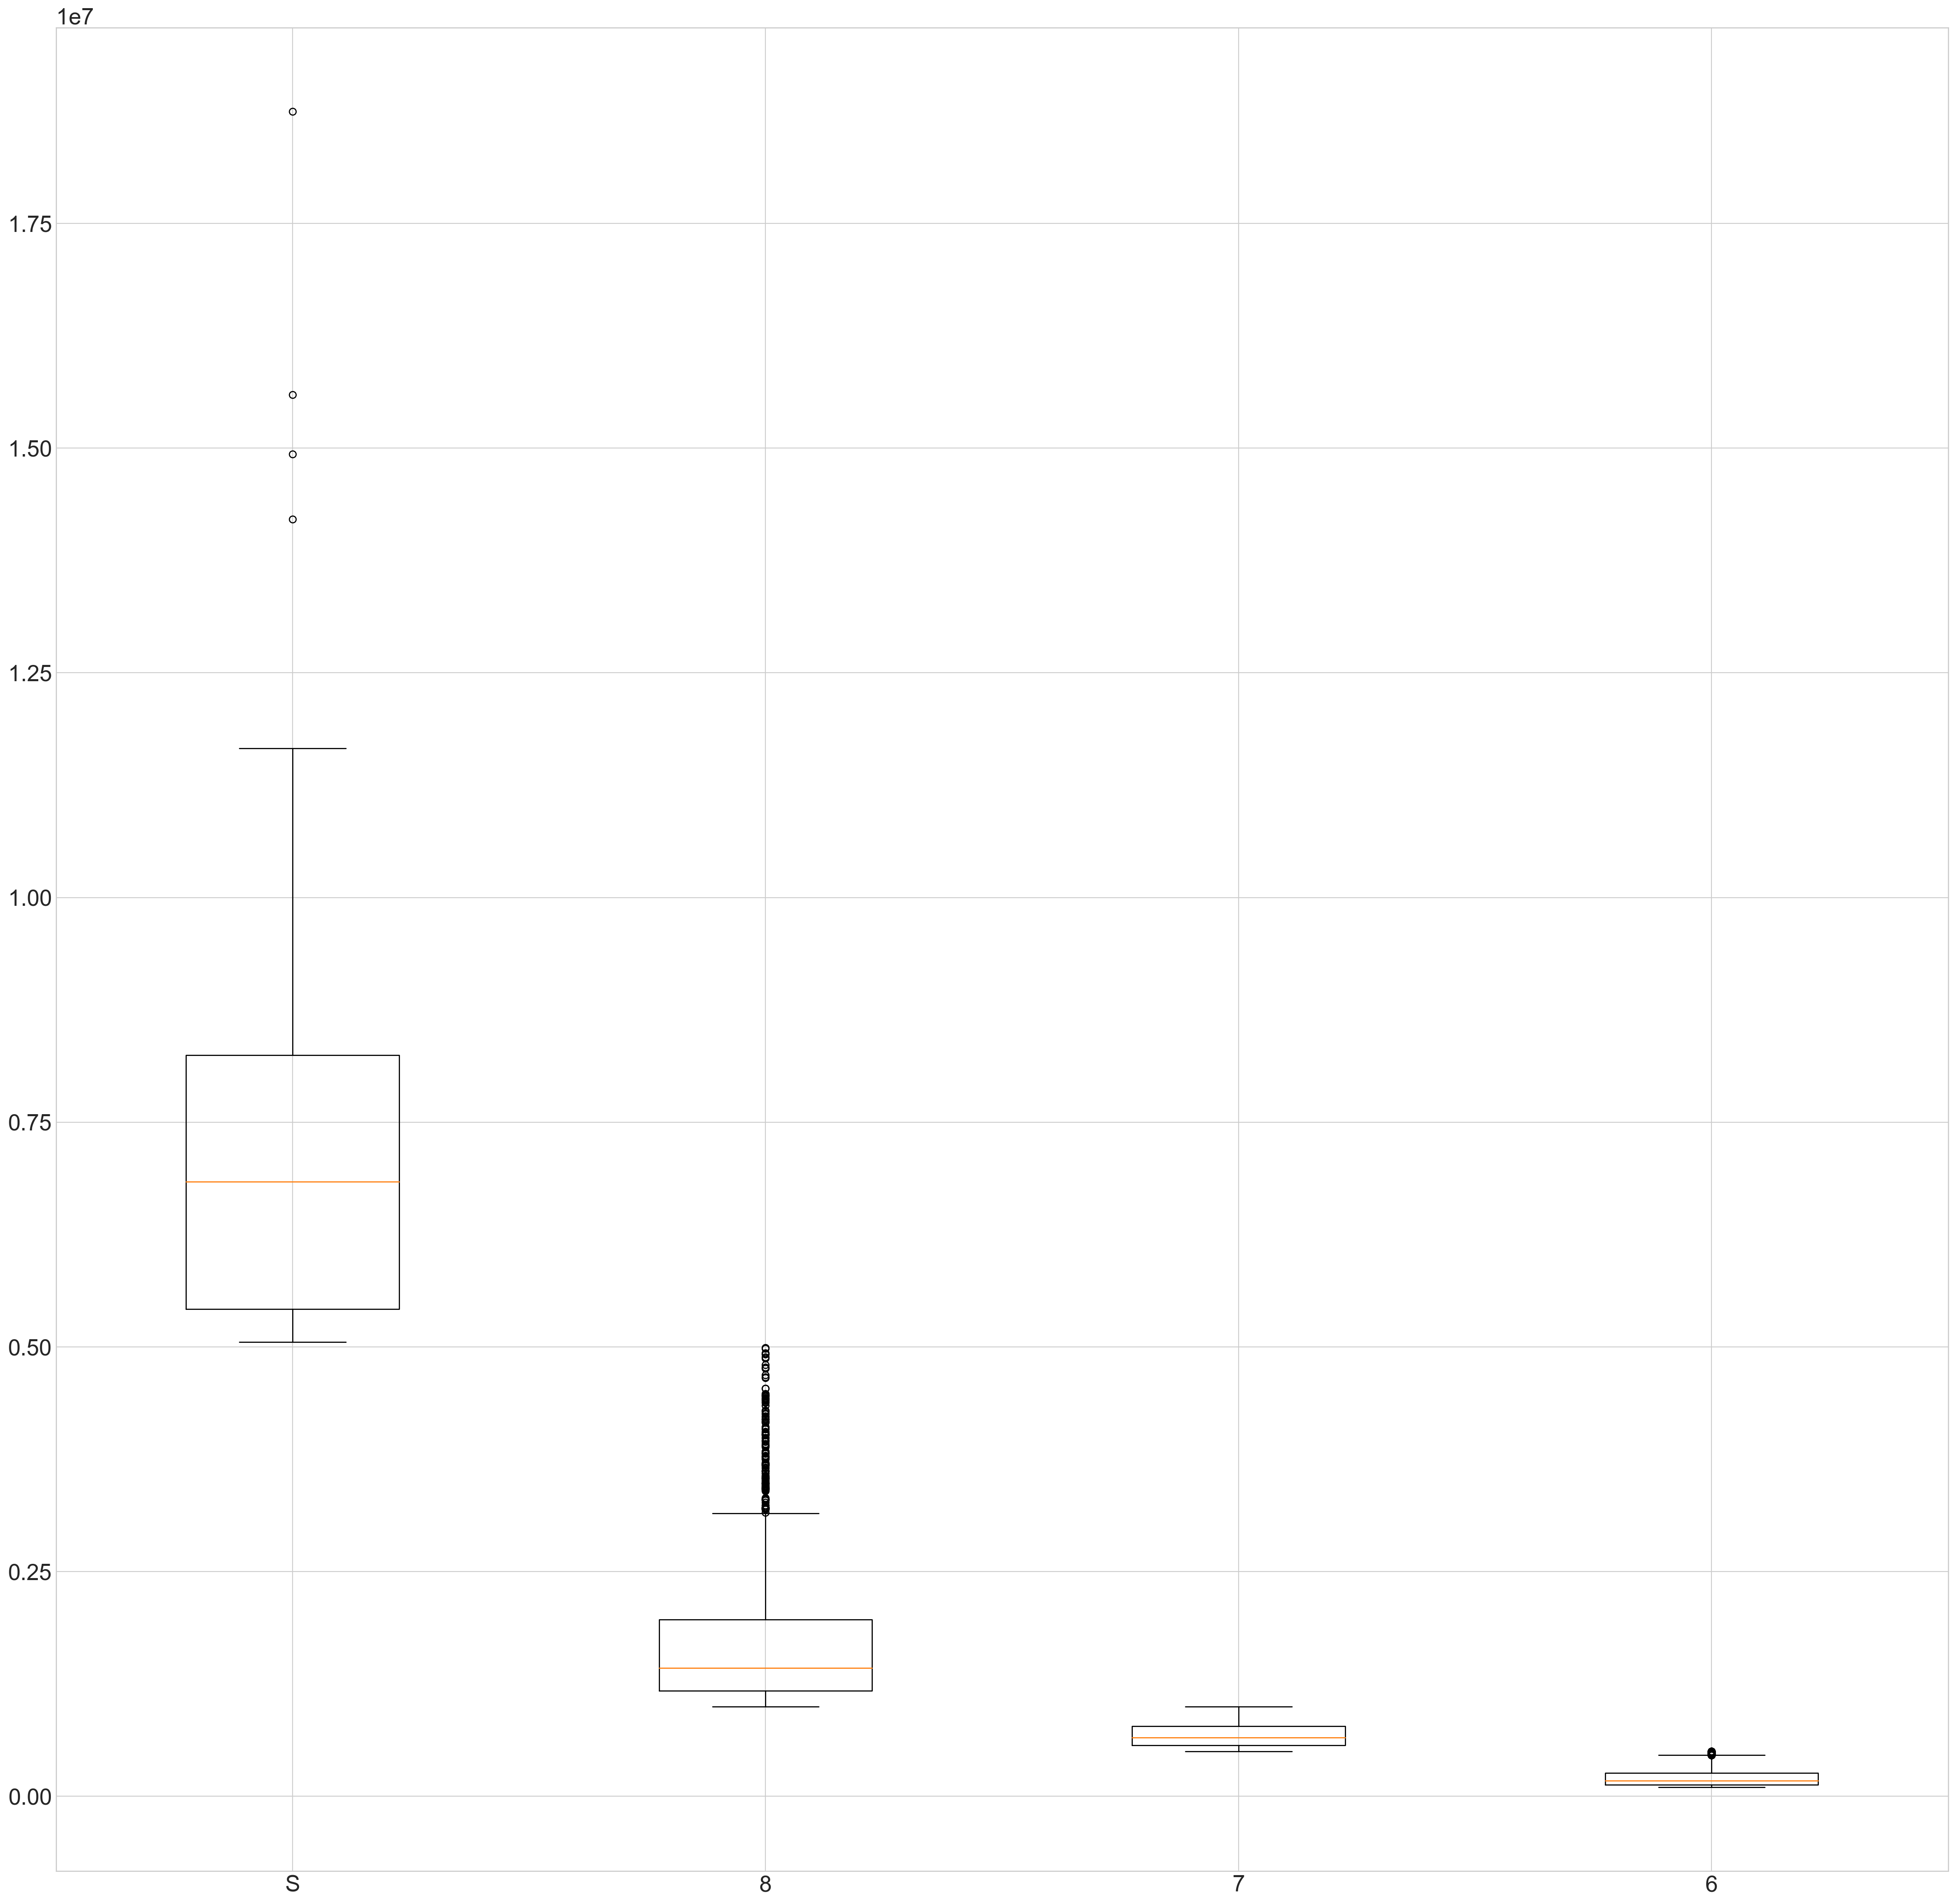

In [73]:
fig = plt.figure(figsize = (30,30), dpi = 200)
ax = fig.gca()
ax.boxplot([rfm_segment[rfm_segment['M_Quartile'] == 'S']['Monetary'],
                rfm_segment[rfm_segment['M_Quartile'] == '8']['Monetary'],
                rfm_segment[rfm_segment['M_Quartile'] == '7']['Monetary'],
                rfm_segment[rfm_segment['M_Quartile'] == '6']['Monetary']], labels = ['S', '8', '7', '6'])

# plt.boxplot(rfm_segment[rfm_segment['M_Quartile'] == 'S']['Monetary'])
# plt.boxplot(rfm_segment[rfm_segment['M_Quartile'] == '7']['Monetary'])

plt.show()

In [74]:
# Allocate all remaining customers to others segment category
# rfm_segment.Segment.fillna('others', inplace=True)


In [75]:
rfm_segment.sample(10)

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
41663,11358586,พิชัย ชำนาญณรงค์ศักดิ์,396,14,249717.42,> 12 months,10 - 50 piece,100K - 500K,1,2,6,126,lost
276865,11632946,นันทวุฒิ สุวรรณาคม,547,2,396.00,> 12 months,< 10 piece,<1K,1,1,1,111,others
352043,11683361,เวิลด์ ซิลเวอร์ จิวเวลรี่,486,2,5594.00,> 12 months,< 10 piece,5K - 10K,1,1,3,113,others
28597,11732314,กมลรัตน์ มีสัจ,304,6,102343.48,6 - 12 months,< 10 piece,100K - 500K,2,1,6,216,needattention
13990,11504546,อนุรัตน์ ตั้งเส้ง,151,6,136090.30,1 - 6 months,< 10 piece,100K - 500K,3,1,6,316,promising
67617,11595280,นิยม นารถโคตร,608,4,69056.72,> 12 months,< 10 piece,50K - 100K,1,1,5,115,lost
293910,11814974,สมาน เนตรวงค์,335,1,198.00,6 - 12 months,< 10 piece,<1K,2,1,1,211,others
265678,11514138,ทรัพย์ ขยัน,790,1,534.00,> 12 months,< 10 piece,<1K,1,1,1,111,others
445130,11601229,เว็ลเซลล์,639,3,3229.00,> 12 months,< 10 piece,1K - 5K,1,1,2,112,others
464861,10324269,ลอมาดี้ ล้ำประเสริฐ,243,2,1766.00,6 - 12 months,< 10 piece,1K - 5K,2,1,2,212,others


C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

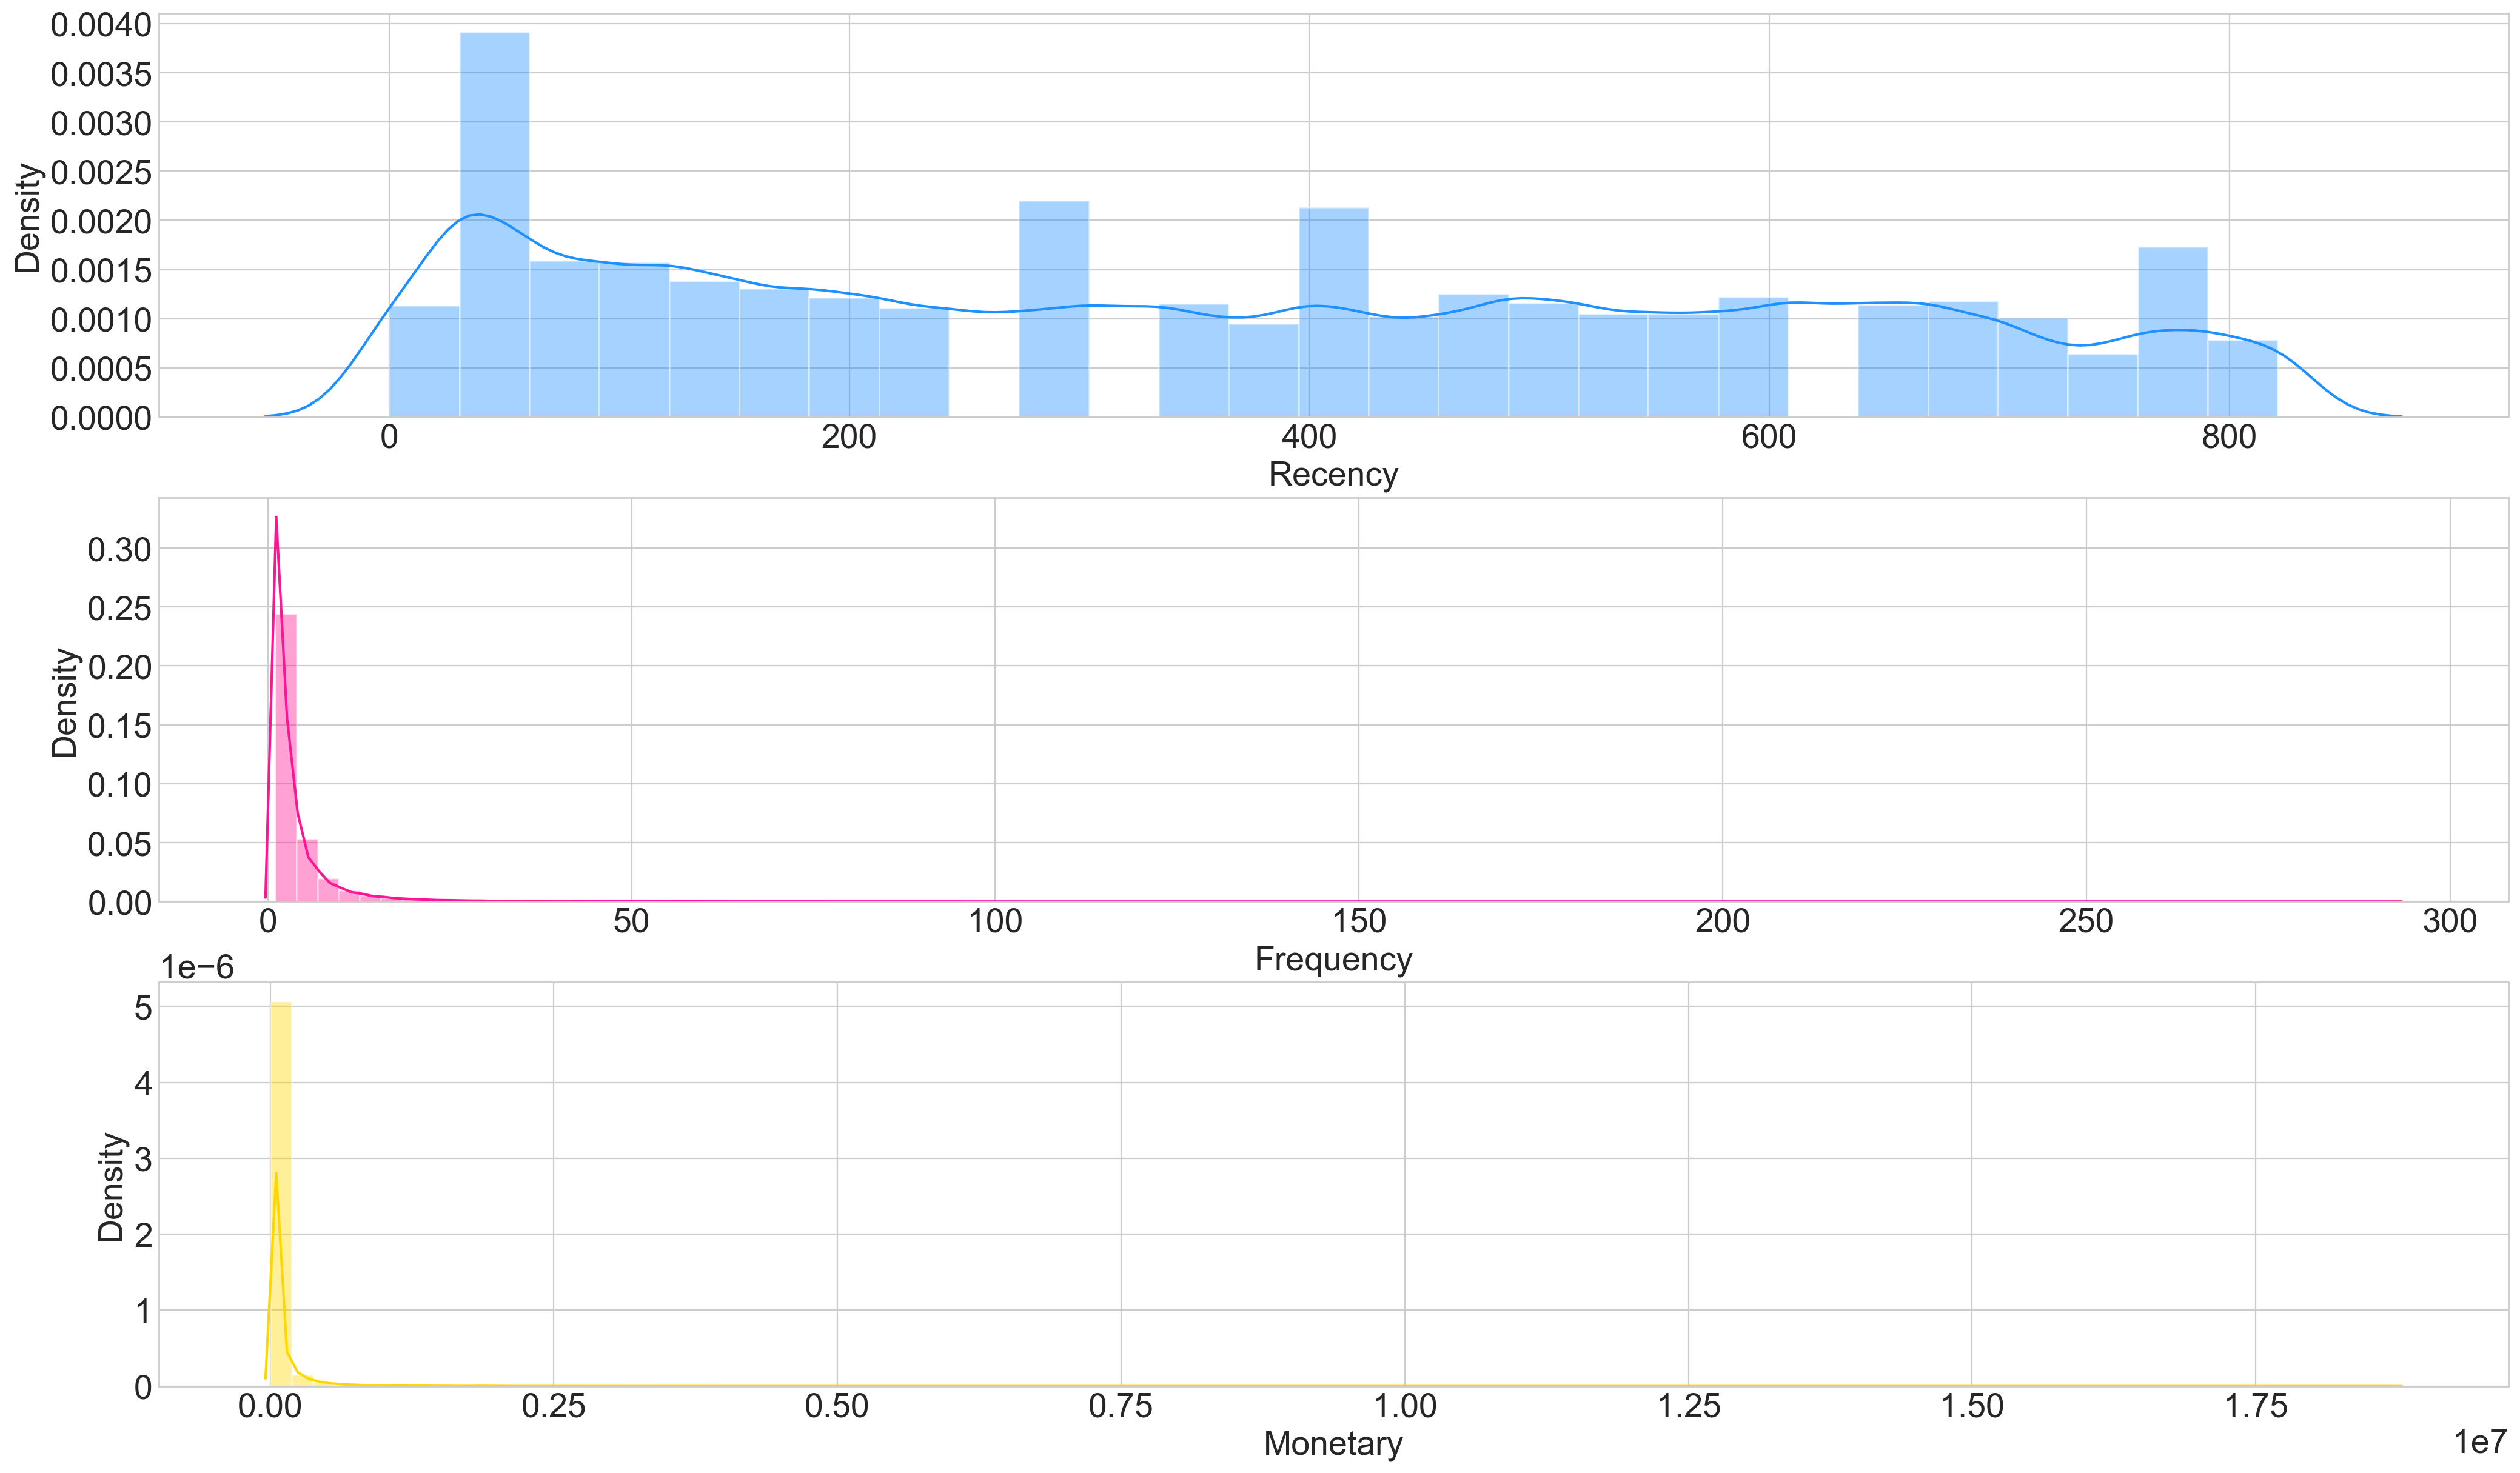

In [76]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(25, 15), dpi = 200)
sns.set_theme()
sns.set(font_scale = 1)
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency', bins = 27)
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency', bins = 100)
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary', bins = 100)
# plt.xlim(50,75);
plt.show();

In [77]:
rfm_segment_focus = rfm_segment[rfm_segment['Segment'] != 'others']
rfm_segment_focus

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82995,11902543,อ่อนนุชทำดี การาจ,212,11,63266.00,6 - 12 months,10 - 50 piece,50K - 100K,2,2,5,225,needattention
82996,11903901,นุสรา รามนัฏ,212,11,64055.60,6 - 12 months,10 - 50 piece,50K - 100K,2,2,5,225,needattention
82997,11906361,อติพร สุวรรณ,212,11,85441.88,6 - 12 months,10 - 50 piece,50K - 100K,2,2,5,225,needattention
82998,11917275,เดียบอน พีซี,212,12,55405.36,6 - 12 months,10 - 50 piece,50K - 100K,2,2,5,225,needattention


C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\phznz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

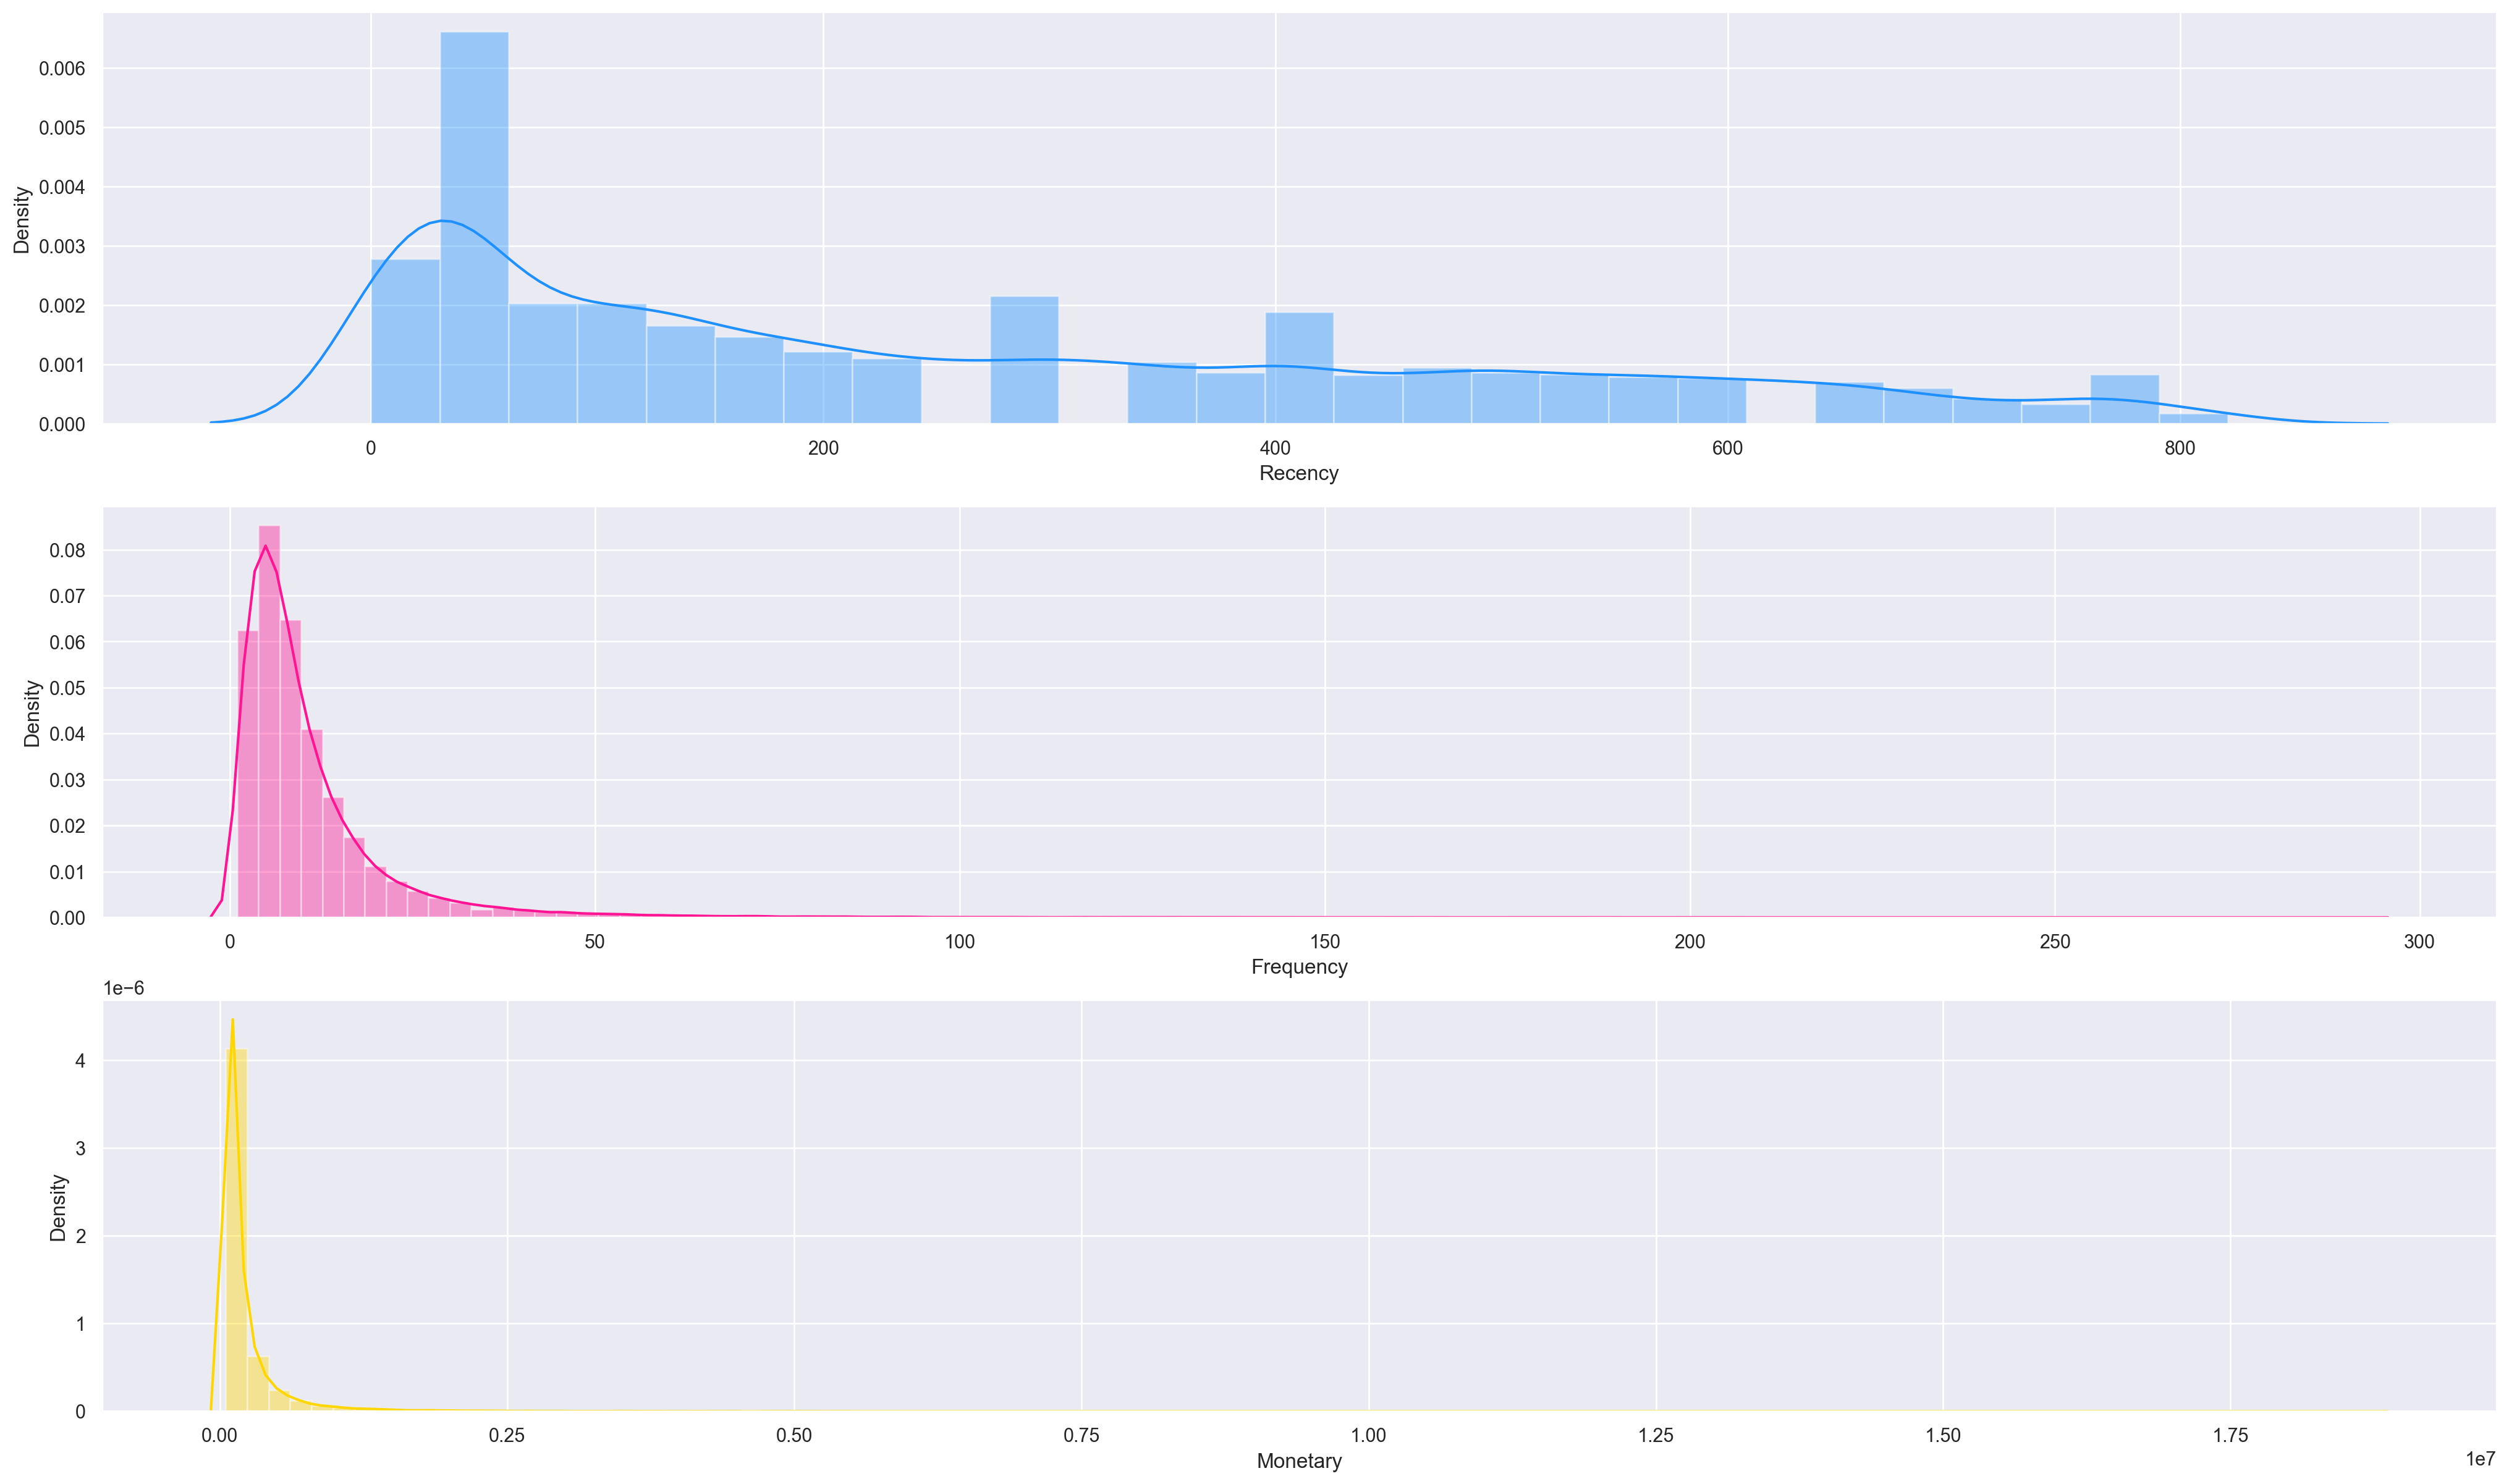

In [78]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(25, 15), dpi = 200)
sns.set_theme()
sns.set(font_scale = 1)
sns.distplot(rfm_segment_focus.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency', bins = 27)
sns.distplot(rfm_segment_focus.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency', bins = 100)
sns.distplot(rfm_segment_focus.Monetary , color="gold", ax=axes[2], axlabel='Monetary', bins = 100)
# plt.xlim(50,75);
plt.show();

In [79]:
rfm_segment

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486445,11301137,พีพี เอ็นจิเนียริ่ง (1988),365,11,3350.28,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486446,11309754,บาซิลิโก 2018,304,12,1551.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486447,11376746,ณิชาดา หวังซื่อกุล,274,13,4856.72,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486448,11388042,สปาร์ค เอ็นจิเนียริ่ง,212,12,4295.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others


In [80]:
rfm_segment[~rfm_segment['M_Quartile'].isin(['1', '2', '3', '4'])]['Monetary'].sum()/(rfm_segment.Monetary.sum())

0.8169817120745403

In [81]:
rfm_segment[~rfm_segment['M_Quartile'].isin(['1', '2', '3', '4'])]['Monetary'].sum()

18547566977.14

In [82]:
for i in np.unique(rfm_segment_focus.Segment):
    print(SEGMENTvalue(rfm_segment_focus.reset_index(), i))

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
----------------------------------------------------------------------
SEGMENT : cantlose
number of Customer : 4
sum monetary : 18547.57 million
-----------------------------------------------------------------------
sum monetary by segment : 30934846.1
min monetary by segment : 5602726.95
max monetary by segment : 11584219.65
average monetary by segment : 7733711.52
---------------------------- million unit -------------------------
sum monetary by segment : 30.93 million
min monetary by segment : 5.6 million
max monetary by segment : 11.58 million
average monetary by segment : 7.73 million
-----------------------------------------------------------------------
percent monetary : 0.17 %
percent of customers : 0.0048 %
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
None
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [83]:
rfm_segment.groupby('Segment').agg('mean')

,Recency,Frequency,Monetary
Segment,,,
cantlose,288.750000,27.750000,7.733712e+06
diamond,3.321429,111.982143,7.403199e+06
lost,562.071642,6.674445,1.449837e+05
loyal,44.044921,42.523226,1.830548e+06
needattention,284.288022,8.936009,1.803866e+05
others,385.540461,2.418126,1.029863e+04
promising,74.968070,12.341756,2.004280e+05


In [84]:
rfm_segment_new = rfm_segment[(rfm_segment['Frequency'] == 1) & (rfm_segment['R_Quartile'] == 'S') & (rfm_segment['Segment'] != 'others')]
rfm_segment_new = rfm_segment_new.assign(Segment = 'new customer')

In [85]:
rfm_segment_old = rfm_segment[~((rfm_segment['Frequency'] == 1) & (rfm_segment['R_Quartile'] == 'S') & (rfm_segment['Segment'] != 'others'))]
rfm_segment_old

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486445,11301137,พีพี เอ็นจิเนียริ่ง (1988),365,11,3350.28,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486446,11309754,บาซิลิโก 2018,304,12,1551.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486447,11376746,ณิชาดา หวังซื่อกุล,274,13,4856.72,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others
486448,11388042,สปาร์ค เอ็นจิเนียริ่ง,212,12,4295.00,6 - 12 months,10 - 50 piece,1K - 5K,2,2,2,222,others


In [86]:
rfm_segment2 = pd.concat([rfm_segment_old, rfm_segment_new])
rfm_segment2

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
0,10000003,ออกัสท์ เดคอเรชั่น,0,122,6404174.53,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
1,10002633,แซมซั่น คอนแทรคเตอร์,0,64,7618392.96,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
2,10003736,เค.ซี.พี.มาสเตอร์ เอ็นจิเนียริ่ง,0,74,5105794.69,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
3,10005504,โฟร์พัฒนา,0,97,5185215.66,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
4,10007418,ไรซิ่ง ซัน ดีเวลลอปเม้นท์,31,117,7345904.72,< 1 month,> 50 piece,> 5M,S,S,S,SSS,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50155,12460304,พนาภรณ์ เดชธนู,0,1,94720.50,< 1 month,< 10 piece,50K - 100K,S,1,5,S15,new customer
50158,12460550,ศรัณย์ กีรติพงศธร,0,1,52164.00,< 1 month,< 10 piece,50K - 100K,S,1,5,S15,new customer
50163,12460935,ณัฏวัฒน์บ้านและที่ดิน,0,1,62937.00,< 1 month,< 10 piece,50K - 100K,S,1,5,S15,new customer
50166,12461489,วีรนุช ปุริโส,0,1,69948.50,< 1 month,< 10 piece,50K - 100K,S,1,5,S15,new customer


In [87]:
rfm_segment2[rfm_segment2['Segment'] == 'new customer']

,CustomerID,Cust Name,Recency,Frequency,Monetary,R_range,F_range,M_range,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2782,10604839,111 พานิช,0,1,540895.52,< 1 month,< 10 piece,500K - 1M,S,1,7,S17,new customer
2844,11578474,ธีรวุฒิ เกตุลอย,31,1,515101.00,< 1 month,< 10 piece,500K - 1M,S,1,7,S17,new customer
2975,12437571,ออร่า ริช (ประเทศไทย),31,1,557118.72,< 1 month,< 10 piece,500K - 1M,S,1,7,S17,new customer
7575,10110659,เทียนชัย อมฤตฤดี,31,1,228101.76,< 1 month,< 10 piece,100K - 500K,S,1,6,S16,new customer
7592,10126557,อมรวดี จันทรา,31,1,103596.00,< 1 month,< 10 piece,100K - 500K,S,1,6,S16,new customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50155,12460304,พนาภรณ์ เดชธนู,0,1,94720.50,< 1 month,< 10 piece,50K - 100K,S,1,5,S15,new customer
50158,12460550,ศรัณย์ กีรติพงศธร,0,1,52164.00,< 1 month,< 10 piece,50K - 100K,S,1,5,S15,new customer
50163,12460935,ณัฏวัฒน์บ้านและที่ดิน,0,1,62937.00,< 1 month,< 10 piece,50K - 100K,S,1,5,S15,new customer
50166,12461489,วีรนุช ปุริโส,0,1,69948.50,< 1 month,< 10 piece,50K - 100K,S,1,5,S15,new customer


In [88]:
rfm_segment2[rfm_segment2['Segment'] == 'new customer'].Monetary.sum()

40406876.45